# **Regresión logística**

Autor: Roberto Abdón Hernández García

**¿Qué es una regresión logística?**

Es el proceso de  de clasificación que predice la probabilidad de un resultado binario (sí/no, 0/1) a partir de variables de entrada.

**Métricas de evaluación de un modelo de regresión logística**
* Matriz de confusión: Es una tabla que resume el rendimiento de un clasificador. Se dividen en: verdaderos Positivos (VP), donde el modelo predijo correctamente la clase positiva; verdaderos Negativos (VN), donde el modelo predijo correctamente la clase negativa; falsos Positivos (FP), donde el modelo predijo erróneamente la clase positiva y falsos Negativos (FN), donde el modelo predijo erróneamente la clase negativa.
* Accuracy: Indica la proporción de predicciones correctas sobre el total de predicciones. Un modelo perfecto no tendría ningún falso positivo ni ningún falso negativo y, por lo tanto, tendría una precisión de 1.0 o 100%.
* Precision: Mide la proporción de verdaderos positivos entre todas las predicciones positivas. Es útil cuando el costo de los falsos positivos es alto. Un modelo hipotético perfecto no tendría ningún falso positivo y, por lo tanto, una precisión de 1.0.
* Recall: Mide la proporción de verdaderos positivos entre todas las instancias positivas reales. Es importante cuando el costo de los falsos negativos es alto. Un modelo hipotético perfecto no tendría ningún falso negativo y, por lo tanto, una recuperación (TPR) de 1.0, es decir, una tasa de detección del 100%.
* ROC y AUC: La curva ROC ofrece una representación visual de las compensaciones entre la tasa de verdaderos positivos (TPR) y la tasa de falsos positivos (FPR) con distintos umbrales. Mientras que AUC o Área Bajo la Curva, es un valor escalar único que va de 0 a 1, y que da una instantánea del rendimiento del modelo. Sólo se calcula el AUC después de generar la curva ROC, porque el AUC representa el área bajo la curva. Un AUC de 0.5 indica un modelo aleatorio y 1.0 un modelo perfecto.



# **Pasos para la creación de un modelo de regresión logística**

## **1-Enlazar la cuenta de Google Drive a Google Colab**

El primer paso es enlazar Google Drive a la cuenta de Google Colab donde se va a trabajar. Esto se realiza para el almacenamiento permanente de los datasets con los que se va a trabajar.

In [ ]:
#Enlazar Google Drive a Google Colab
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


## **2-Importar ubicación del token API de Kaggle**

Se importa un token API en Kaggle, que es necesario para la descarga de datasets directamente dese allí, siendo ésta una forma más cómoda de acceso a los datasets.

In [ ]:
import os
os.environ['KAGGLE_CONFIG_DIR'] = "/content/gdrive/MyDrive/Kaggle"
%cd /content/gdrive/My Drive/Colab Notebooks/Colab

/content/gdrive/My Drive/Colab Notebooks/Colab


## **3-Descargar dataset desde Kaggle**

Se descarga directamente el dataset que se encontró en Kaggle con este código. -d indica que sólo se busca descargar el archivo .csv que contiene el dataset.

In [ ]:
!kaggle datasets download -d aslanahmedov/predict-term-deposit

Dataset URL: https://www.kaggle.com/datasets/aslanahmedov/predict-term-deposit
License(s): copyright-authors
predict-term-deposit.zip: Skipping, found more recently modified local copy (use --force to force download)


## **4-Descomprimir dataset**

Como el o los archivos que se descargan se comprimen en formato .zip, es necesario descomprimir el paquete para tener el acceso a los archivos con los cuales se van a trabajar.

In [ ]:
!unzip predict-term-deposit.zip

Archive:  predict-term-deposit.zip
replace Assignment-2_Data.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: n


## **5-Leer dataset**

**Dataset elegido de Kaggle: Predict Term Deposit**

**Contexto**<br>
Un banco ofrece diversos productos bancarios a sus clientes, como cuentas de ahorro, tarjetas de crédito, inversiones, etc. mediante campañas de marketing. Se busca predecir si un cliente realizará un depósito a plazo fijo.

Un depósito a plazo fijo es un producto financiero donde el cliente deposita una suma de dinero en un banco por un tiempo específico y limitado. Al final de ese plazo, puede retirar el monto principal junto con los intereses acumulados.

Para predecir, se cuenta con información diversa sobre los clientes, como los datos demográficos, el comportamiento bancario, etc.

**Columnas del dataset:**
* Id: Identificador único del cliente (Id).
* age: Edad del cliente (numérica-ratio).
* job: Ocupación del cliente (categórica-nominal).
* martial: Estado civil del cliente (categórica-nominal).
* education: Escolaridad del cliente (categórica-ordinal).
* default: Indica si el cliente ha incumplido pagos de una deuda (binaria).
* balance: Balance de la cuenta del cliente (numérica-ratio).
* housing: Indica si el cliente tiene un préstamo hipotecario (binaria).
* loan: Indica si el cliente tiene un préstamo personal (binaria).
* contact: Medio de contacto con el cliente (categórica-nominal).
* day: Día de la fecha donde se produjo el último contacto con el cliente (numérica).
* month: Mes de la fecha donde se produjo el último contacto con el cliente (categórica).
* duration: Duración del último contacto, en segundos (numérica-ratio).
* campaign: Número de contactos realizados durante esta campaña y para este cliente (numérica-ratio).
* pdays: Número de días transcurridos desde la última vez que se contactó al cliente (numérica-ratio).
* previous: Número de contactos realizados al cliente desde su registro en el banco (numérica-ratio).
* poutcome: El cliente manifiestó o no adquirir algún producto bancario (categórica).
* y: Indica si el cliente realizará un depósito a plazo fijo (binaria).

Como primer paso se lee el archivo .csv y se convierte en un dataframe para realizar una inspección visual inicial del dataset.

In [ ]:
import pandas as pd

data=pd.read_csv('Assignment-2_Data.csv')
data

,Id,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,1001,999.0,management,married,tertiary,no,2143.0,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,1002,44.0,technician,single,secondary,no,29.0,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,1003,33.0,entrepreneur,married,secondary,no,2.0,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,1004,47.0,blue-collar,married,unknown,no,1506.0,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,1005,33.0,unknown,single,unknown,no,1.0,no,no,unknown,5,may,198,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,46207,51.0,technician,married,tertiary,no,825.0,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,46208,71.0,retired,divorced,primary,no,1729.0,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,46209,72.0,retired,married,secondary,no,5715.0,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,46210,57.0,blue-collar,married,secondary,no,668.0,no,no,telephone,17,nov,508,4,-1,0,unknown,no


Dentro de esta inspección visual inicial se puede observar que:
* Hay 45211 registros y 18 columnas.
* Id es una columna de Id, por lo cual puede eliminarse desde ya.
* Además en pdays hay valores -1, lo cual al revisar el contexto del dataset en Kaggle, esto significa que el cliente no había sido contactado previamente.
* Hay algunos datos atípicos que se deben revisar (por ejemplo, hay un registro con age=999).
* Hay registros con datos "unknown". Se debe considerar si estos datos desconocidos afectarán al modelo.

**Antes de empezar a determinar qué datos y columnas serán de utilidad para el entrenamiento del modelo, primero se realiza una limpieza general del dataset.**

## **6-Eliminación de la columna Id**

Esta columna sólo determina el orden de los registros por fecha del contacto con el cliente. Está algo relacionada con pdays y previous debido a que estas cuentan las fechas del último contacto con el cliente (los contactos más recientes tienen un número de ID mayor) y con el número de contactos previos que se hicieron (los registros más recientes suelen tener un número mayor de contactos previos). En sí ID es una columna que ordena los registros y no dice absolutamente nada de información sobre el cliente o el contacto que el banco tuvo con este, por lo cual puede ser eliminada.

In [ ]:
# Eliminar columna Id
data_cleaned = data.drop(columns=["Id"])
data_cleaned

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,999.0,management,married,tertiary,no,2143.0,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44.0,technician,single,secondary,no,29.0,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33.0,entrepreneur,married,secondary,no,2.0,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47.0,blue-collar,married,unknown,no,1506.0,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33.0,unknown,single,unknown,no,1.0,no,no,unknown,5,may,198,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51.0,technician,married,tertiary,no,825.0,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71.0,retired,divorced,primary,no,1729.0,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72.0,retired,married,secondary,no,5715.0,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57.0,blue-collar,married,secondary,no,668.0,no,no,telephone,17,nov,508,4,-1,0,unknown,no


## **7-Manejo de valores nulos**

### Visualizar valores nulos

Durante la exploración se observan que hay 9 valores nulos en la columna age y 3 en balance. Además, se muestran aquellos registros con valores nulos.

In [ ]:
print(data_cleaned.isnull().sum())
data_cleaned[data_cleaned.isnull().any(axis=1)]

age          9
job          0
marital      0
education    0
default      0
balance      3
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64


,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
7,NaN,entrepreneur,divorced,tertiary,yes,NaN,yes,no,unknown,5,may,380,1,-1,0,unknown,no
8,58.0,retired,married,primary,no,NaN,yes,no,unknown,5,may,50,1,-1,0,unknown,no
9,43.0,technician,single,secondary,no,NaN,yes,no,unknown,5,may,55,1,-1,0,unknown,no
53,NaN,admin.,single,secondary,no,-76.0,yes,no,unknown,5,may,787,1,-1,0,unknown,no
54,NaN,technician,single,secondary,no,-103.0,yes,yes,unknown,5,may,145,1,-1,0,unknown,no
55,NaN,entrepreneur,single,tertiary,no,243.0,no,yes,unknown,5,may,174,1,-1,0,unknown,no
56,NaN,management,single,tertiary,no,424.0,yes,no,unknown,5,may,104,1,-1,0,unknown,no
57,NaN,blue-collar,married,unknown,no,306.0,yes,no,unknown,5,may,13,1,-1,0,unknown,no
58,NaN,blue-collar,single,unknown,no,24.0,yes,no,unknown,5,may,185,1,-1,0,unknown,no
59,NaN,services,married,primary,no,179.0,yes,no,unknown,5,may,1778,1,-1,0,unknown,no


### Eliminación de valores nulos

Al tener aún gran cantidad de datos para trabajar en caso de eliminar los registros con valores nulos (12 de más de 45000), se optó por simplemente eliminarlos. Se verifica que el dataframe ahora ya no muestre esos registros con valores nulos.

In [ ]:
data_cleaned=data_cleaned.dropna()
data_cleaned

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,999.0,management,married,tertiary,no,2143.0,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44.0,technician,single,secondary,no,29.0,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33.0,entrepreneur,married,secondary,no,2.0,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47.0,blue-collar,married,unknown,no,1506.0,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33.0,unknown,single,unknown,no,1.0,no,no,unknown,5,may,198,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51.0,technician,married,tertiary,no,825.0,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71.0,retired,divorced,primary,no,1729.0,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72.0,retired,married,secondary,no,5715.0,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57.0,blue-collar,married,secondary,no,668.0,no,no,telephone,17,nov,508,4,-1,0,unknown,no


## **8-Manejo de valores duplicados**

Se contaron las filas duplicadas para saber si habían o no. Como no se encontraron filas totalmente duplicadas, no se altera el dataframe.

In [ ]:
duplicated_rows = (data_cleaned.duplicated(keep=False))
num_duplicated_rows=duplicated_rows.sum()
print(f"Número total de filas duplicadas: {num_duplicated_rows}")

Número total de filas duplicadas: 0


Como no se encontraron registros repetidos, finalmente se revisan los datos referentes a las columnas que brindan información sobre el cliente (las cuales son **age, job, marital, education, default, balance, housing y loan**). Es algo probable que dos clientes distintos tengan todos estos datos idénticos, así que para efectos prácticos se tomará también la información de los contactos que el banco realizó con ellos para distinguir si son clientes distintos o el mismo.

Se muestran estos registros y aunque se encontraron algunos con información del cliente repetida, se decidió mantenerlos, ya que, efectivamente representan contactos distintos a un mismo cliente (lo cual se determina por la columna pdays) o contactos distintos a clientes que tienen idéntica información.

In [ ]:
#Columnas que indican la información del cliente
cols_cliente = ["age", "job", "marital", "education", "default", "balance", "housing", "loan"]

# Contar duplicados en esas columnas
duplicados_clientes = data_cleaned.duplicated(subset=cols_cliente).sum()
print("Número de clientes duplicados:", duplicados_clientes)

# Mostrar registros duplicados, ordenados según las columnas
data_cleaned[data_cleaned.duplicated(subset=cols_cliente, keep=False)].sort_values(cols_cliente)

Número de clientes duplicados: 4161


,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
40887,18.0,student,single,primary,no,608.0,no,no,cellular,12,aug,267,1,-1,0,unknown,yes
42274,18.0,student,single,primary,no,608.0,no,no,cellular,13,nov,210,1,93,1,success,yes
40744,18.0,student,single,unknown,no,108.0,no,no,cellular,10,aug,167,1,-1,0,unknown,yes
41487,18.0,student,single,unknown,no,108.0,no,no,cellular,8,sep,169,1,-1,0,unknown,yes
42954,18.0,student,single,unknown,no,108.0,no,no,cellular,9,feb,92,1,183,1,success,yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45010,86.0,retired,married,primary,no,1255.0,no,no,cellular,14,oct,192,2,92,4,success,no
41934,92.0,retired,married,unknown,no,775.0,no,no,cellular,22,oct,313,3,-1,0,unknown,yes
42727,92.0,retired,married,unknown,no,775.0,no,no,cellular,26,jan,164,4,96,3,success,yes
44262,93.0,retired,married,unknown,no,775.0,no,no,cellular,22,jul,860,2,177,7,success,yes


## **9-Manejo de valores atípicos**

### Encontrar valores atípicos en variables numéricas

Una de las formas más convenientes y rápidas para la visualización de los valores atípicos es el empleo de los boxplots, que muestran con un círculo aquellos valores atípicos para el manejo de variables numéricas. Por esto, se usa este tipo de gráfico para encontrar posibles valores atípicos en las columnas numéricas del dataframe.

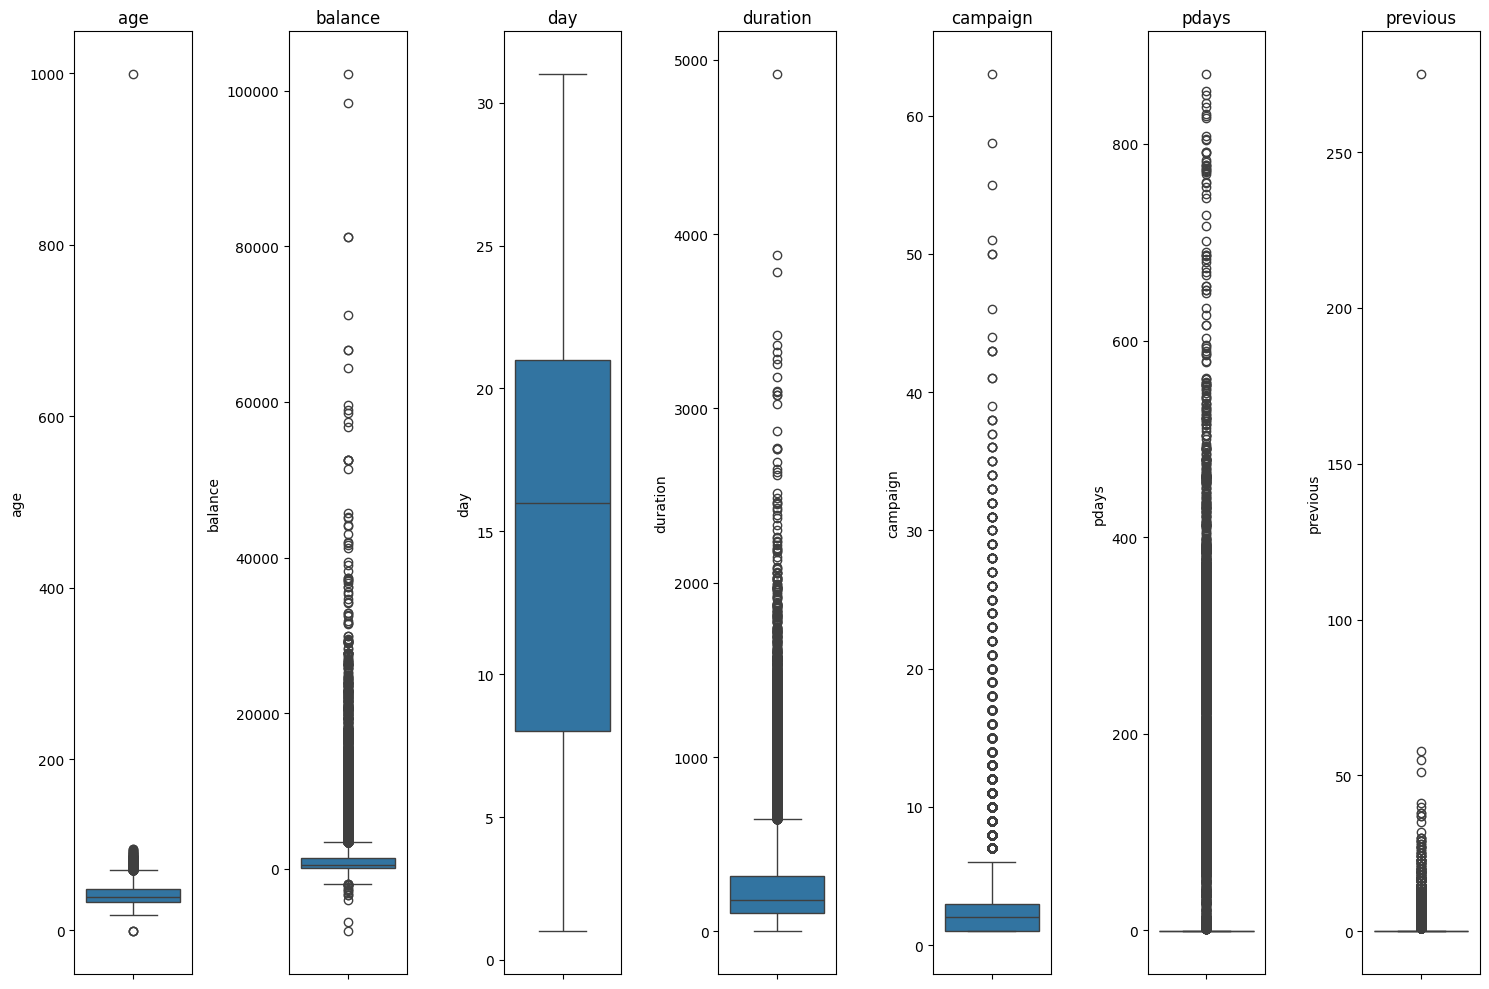

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Seleccionar columnas numéricas
num_cols = data_cleaned.select_dtypes(include=np.number).columns

# Generar boxplots para cada columna
plt.figure(figsize=(15, 10))

for i, col in enumerate(num_cols, 1):
    plt.subplot(1, len(num_cols), i)   # una fila, tantas columnas como num_cols
    sns.boxplot(y=data[col])
    plt.title(col)

plt.tight_layout()
plt.show()

En este caso hay valores sospechosos en age, que están muy por encima de lo que podría vivir una persona o que están en 0 (un recién nacido no sería cliente contactado para una campaña de marketing). También hay columnas con valores que parecieran que fueron tecleados por error en previous. Es por eso que se procede a visualizar los datos con mayor y menor valor en cada columna numérica.

### Columna age

Se revisa la columna age para ver esos valores sospechosos mencionados anteriormente. Efectivamente, se encontraron valores inconsistentes, donde las edades son irreales (999 y -1). Después de encontrarlos, se eliminan las filas con esos valores en age para continuar con la limpieza de datos.

In [ ]:
display(data_cleaned.nlargest(10, "age"))
display(data_cleaned.nsmallest(10, "age"))

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,999.0,management,married,tertiary,no,2143.0,yes,no,unknown,5,may,261,1,-1,0,unknown,no
33699,95.0,retired,divorced,primary,no,2282.0,no,no,telephone,21,apr,207,17,-1,0,unknown,yes
41663,95.0,retired,married,secondary,no,0.0,no,no,telephone,1,oct,215,1,-1,0,unknown,no
31233,94.0,retired,divorced,secondary,no,1234.0,no,no,cellular,3,mar,212,1,-1,0,unknown,no
44262,93.0,retired,married,unknown,no,775.0,no,no,cellular,22,jul,860,2,177,7,success,yes
44420,93.0,retired,married,unknown,no,775.0,no,no,cellular,4,aug,476,2,13,9,success,yes
41934,92.0,retired,married,unknown,no,775.0,no,no,cellular,22,oct,313,3,-1,0,unknown,yes
42727,92.0,retired,married,unknown,no,775.0,no,no,cellular,26,jan,164,4,96,3,success,yes
31069,90.0,retired,divorced,secondary,no,1.0,no,no,cellular,13,feb,152,3,-1,0,unknown,yes
43194,90.0,retired,divorced,primary,no,712.0,no,no,telephone,3,mar,557,1,-1,0,unknown,yes


,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
45203,-1.0,student,single,tertiary,no,113.0,no,no,cellular,17,nov,266,1,-1,0,unknown,yes
45204,-1.0,retired,married,secondary,no,2850.0,no,no,cellular,17,nov,300,1,40,8,failure,yes
45205,-1.0,technician,single,secondary,no,505.0,no,yes,cellular,17,nov,386,2,-1,0,unknown,yes
40736,18.0,student,single,primary,no,1944.0,no,no,telephone,10,aug,122,3,-1,0,unknown,no
40744,18.0,student,single,unknown,no,108.0,no,no,cellular,10,aug,167,1,-1,0,unknown,yes
40887,18.0,student,single,primary,no,608.0,no,no,cellular,12,aug,267,1,-1,0,unknown,yes
41222,18.0,student,single,unknown,no,35.0,no,no,telephone,21,aug,104,2,-1,0,unknown,no
41252,18.0,student,single,secondary,no,5.0,no,no,cellular,24,aug,143,2,-1,0,unknown,no
41273,18.0,student,single,unknown,no,3.0,no,no,cellular,25,aug,130,2,-1,0,unknown,yes
41487,18.0,student,single,unknown,no,108.0,no,no,cellular,8,sep,169,1,-1,0,unknown,yes


In [ ]:
data_cleaned = data_cleaned[(data_cleaned["age"] >= 18) & (data_cleaned["age"] <= 95)]
display(data_cleaned.nlargest(10, "age"))
display(data_cleaned.nsmallest(10, "age"))

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
33699,95.0,retired,divorced,primary,no,2282.0,no,no,telephone,21,apr,207,17,-1,0,unknown,yes
41663,95.0,retired,married,secondary,no,0.0,no,no,telephone,1,oct,215,1,-1,0,unknown,no
31233,94.0,retired,divorced,secondary,no,1234.0,no,no,cellular,3,mar,212,1,-1,0,unknown,no
44262,93.0,retired,married,unknown,no,775.0,no,no,cellular,22,jul,860,2,177,7,success,yes
44420,93.0,retired,married,unknown,no,775.0,no,no,cellular,4,aug,476,2,13,9,success,yes
41934,92.0,retired,married,unknown,no,775.0,no,no,cellular,22,oct,313,3,-1,0,unknown,yes
42727,92.0,retired,married,unknown,no,775.0,no,no,cellular,26,jan,164,4,96,3,success,yes
31069,90.0,retired,divorced,secondary,no,1.0,no,no,cellular,13,feb,152,3,-1,0,unknown,yes
43194,90.0,retired,divorced,primary,no,712.0,no,no,telephone,3,mar,557,1,-1,0,unknown,yes
41162,89.0,retired,married,tertiary,no,553.0,no,no,telephone,19,aug,2027,5,-1,0,unknown,no


,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
40736,18.0,student,single,primary,no,1944.0,no,no,telephone,10,aug,122,3,-1,0,unknown,no
40744,18.0,student,single,unknown,no,108.0,no,no,cellular,10,aug,167,1,-1,0,unknown,yes
40887,18.0,student,single,primary,no,608.0,no,no,cellular,12,aug,267,1,-1,0,unknown,yes
41222,18.0,student,single,unknown,no,35.0,no,no,telephone,21,aug,104,2,-1,0,unknown,no
41252,18.0,student,single,secondary,no,5.0,no,no,cellular,24,aug,143,2,-1,0,unknown,no
41273,18.0,student,single,unknown,no,3.0,no,no,cellular,25,aug,130,2,-1,0,unknown,yes
41487,18.0,student,single,unknown,no,108.0,no,no,cellular,8,sep,169,1,-1,0,unknown,yes
42146,18.0,student,single,secondary,no,156.0,no,no,cellular,4,nov,298,2,82,4,other,no
42274,18.0,student,single,primary,no,608.0,no,no,cellular,13,nov,210,1,93,1,success,yes
42954,18.0,student,single,unknown,no,108.0,no,no,cellular,9,feb,92,1,183,1,success,yes


### Columna balance

Debido a que hay balances positivos y negativos en cuentas y tarjetas de crédito de un cliente, no se necesita realizar ninguna modificación en esta columna.

### Columna day

Se revisa esta columna para ver si hay valores por encima de 31 o menores a 1. Como no hay valores que cumplan con estas condiciones, se procede al siguiente paso

In [ ]:
display(data_cleaned.nlargest(10, "day"))
display(data_cleaned.nsmallest(10, "day"))

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
18244,44.0,services,married,secondary,no,3536.0,no,no,cellular,31,jul,106,6,-1,0,unknown,no
18245,41.0,blue-collar,married,primary,no,1500.0,yes,no,cellular,31,jul,101,6,-1,0,unknown,no
18246,40.0,services,divorced,secondary,no,694.0,yes,no,cellular,31,jul,75,14,-1,0,unknown,no
18247,30.0,admin.,single,secondary,no,394.0,yes,yes,cellular,31,jul,75,3,-1,0,unknown,no
18248,34.0,admin.,married,secondary,no,244.0,yes,no,cellular,31,jul,56,4,-1,0,unknown,no
18249,57.0,blue-collar,divorced,secondary,no,644.0,no,yes,cellular,31,jul,263,4,-1,0,unknown,no
18250,50.0,technician,married,tertiary,no,3337.0,yes,yes,telephone,31,jul,24,14,-1,0,unknown,no
18251,43.0,admin.,married,secondary,no,0.0,no,no,cellular,31,jul,408,8,-1,0,unknown,no
18252,35.0,management,married,tertiary,no,11.0,no,no,cellular,31,jul,22,19,-1,0,unknown,no
18253,27.0,services,single,secondary,no,0.0,yes,no,cellular,31,jul,35,6,-1,0,unknown,no


,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
12443,59.0,retired,married,secondary,yes,49.0,no,yes,unknown,1,jul,602,4,-1,0,unknown,no
12444,41.0,services,married,secondary,no,138.0,yes,no,unknown,1,jul,136,3,-1,0,unknown,no
12445,30.0,blue-collar,married,secondary,no,365.0,no,no,unknown,1,jul,381,4,-1,0,unknown,no
12446,44.0,admin.,single,tertiary,no,10.0,no,no,unknown,1,jul,158,2,-1,0,unknown,no
12447,41.0,blue-collar,single,secondary,no,75.0,yes,no,unknown,1,jul,479,9,-1,0,unknown,yes
12448,31.0,blue-collar,married,secondary,no,652.0,no,yes,unknown,1,jul,281,3,-1,0,unknown,no
12449,49.0,technician,married,tertiary,no,503.0,no,no,unknown,1,jul,297,2,-1,0,unknown,no
12450,35.0,technician,married,secondary,no,251.0,yes,yes,unknown,1,jul,128,3,-1,0,unknown,no
12451,39.0,blue-collar,married,secondary,no,971.0,yes,yes,unknown,1,jul,471,3,-1,0,unknown,no
12452,51.0,admin.,divorced,secondary,no,-20.0,no,no,unknown,1,jul,58,1,-1,0,unknown,no


### Columna duration

Como duration se refiere a la duración del último contacto con el cliente en segundos, cualquier valor igual o superior a cero puede ser considerado normal, siempre y cuando no sea una cifra demasiado alta.

In [ ]:
display(data_cleaned.nlargest(10, "duration"))
display(data_cleaned.nsmallest(10, "duration"))

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
24148,59.0,technician,married,tertiary,no,6573.0,yes,no,telephone,10,nov,4918,1,-1,0,unknown,no
9947,59.0,management,married,secondary,no,1321.0,no,no,unknown,9,jun,3881,3,-1,0,unknown,yes
44602,45.0,services,single,secondary,no,955.0,no,no,unknown,27,aug,3785,1,-1,0,unknown,no
19639,37.0,blue-collar,married,tertiary,no,359.0,no,yes,cellular,7,aug,3422,2,-1,0,unknown,no
2386,45.0,blue-collar,married,secondary,no,66.0,yes,no,unknown,13,may,3366,3,-1,0,unknown,no
21113,43.0,self-employed,married,tertiary,no,423.0,no,no,cellular,14,aug,3322,2,-1,0,unknown,no
24095,30.0,admin.,married,secondary,no,1310.0,no,no,telephone,27,oct,3284,1,-1,0,unknown,no
24044,36.0,self-employed,single,tertiary,no,-103.0,yes,yes,telephone,17,oct,3253,1,-1,0,unknown,yes
12347,28.0,admin.,single,secondary,no,-7.0,no,yes,unknown,26,jun,3183,2,-1,0,unknown,yes
30747,53.0,admin.,married,secondary,no,849.0,yes,no,cellular,6,feb,3102,3,-1,0,unknown,yes


,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
6424,53.0,management,married,primary,no,351.0,yes,no,unknown,27,may,0,4,-1,0,unknown,no
22937,35.0,technician,married,secondary,no,5535.0,no,no,cellular,26,aug,0,15,-1,0,unknown,no
36425,31.0,entrepreneur,married,secondary,no,162.0,yes,yes,cellular,11,may,0,2,-1,0,unknown,no
31740,39.0,technician,divorced,secondary,no,17441.0,yes,yes,cellular,7,apr,1,1,-1,0,unknown,no
44758,28.0,admin.,married,secondary,no,1595.0,no,no,unknown,9,sep,1,1,254,4,success,no
287,50.0,technician,single,tertiary,no,339.0,yes,no,unknown,5,may,2,3,-1,0,unknown,no
24994,36.0,blue-collar,married,primary,no,871.0,yes,yes,telephone,18,nov,2,1,-1,0,unknown,no
30278,54.0,unemployed,divorced,secondary,no,925.0,no,no,cellular,5,feb,2,1,-1,0,unknown,no
2177,43.0,blue-collar,married,primary,no,0.0,yes,no,unknown,12,may,3,1,-1,0,unknown,no
2599,35.0,technician,married,secondary,no,304.0,yes,no,unknown,13,may,3,1,-1,0,unknown,no


### Columna campaign

Se revisa la columna campaign para varificar que el número de contactos realizados en la campaña sean igual o mayores a 1. Como no existen valores menores que 1, no se realizan modificaciones al dataset.

In [ ]:
display(data_cleaned.nlargest(10, "campaign"))
display(data_cleaned.nsmallest(10, "campaign"))

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
4330,45.0,management,married,unknown,no,9051.0,yes,no,unknown,19,may,124,63,-1,0,unknown,no
11914,24.0,technician,single,primary,no,126.0,yes,no,unknown,20,jun,10,58,-1,0,unknown,no
5073,35.0,technician,married,secondary,no,432.0,yes,no,unknown,21,may,1094,55,-1,0,unknown,no
4299,30.0,management,single,tertiary,no,358.0,yes,no,unknown,19,may,88,51,-1,0,unknown,no
5459,35.0,blue-collar,married,secondary,no,430.0,yes,no,unknown,23,may,147,50,-1,0,unknown,no
18713,35.0,blue-collar,married,secondary,no,280.0,yes,yes,cellular,31,jul,65,50,-1,0,unknown,no
10697,28.0,blue-collar,single,secondary,no,235.0,yes,no,unknown,16,jun,102,46,-1,0,unknown,no
18744,49.0,blue-collar,married,primary,no,371.0,yes,no,cellular,31,jul,18,44,-1,0,unknown,no
4275,40.0,blue-collar,married,secondary,no,-365.0,yes,no,unknown,19,may,44,43,-1,0,unknown,no
13675,51.0,blue-collar,married,unknown,no,41.0,yes,no,telephone,9,jul,16,43,-1,0,unknown,no


,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
1,44.0,technician,single,secondary,no,29.0,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33.0,entrepreneur,married,secondary,no,2.0,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47.0,blue-collar,married,unknown,no,1506.0,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33.0,unknown,single,unknown,no,1.0,no,no,unknown,5,may,198,1,-1,0,unknown,no
5,35.0,management,married,tertiary,no,231.0,yes,no,unknown,5,may,139,1,-1,0,unknown,no
6,28.0,management,single,tertiary,no,447.0,yes,yes,unknown,5,may,217,1,-1,0,unknown,no
10,41.0,admin.,divorced,secondary,no,270.0,yes,no,unknown,5,may,222,1,-1,0,unknown,no
11,29.0,admin.,single,secondary,no,390.0,yes,no,unknown,5,may,137,1,-1,0,unknown,no
12,53.0,technician,married,secondary,no,6.0,yes,no,unknown,5,may,517,1,-1,0,unknown,no
13,58.0,technician,married,unknown,no,71.0,yes,no,unknown,5,may,71,1,-1,0,unknown,no


Debido a que hay muchos valores cercanos a 1,

### Columna pdays

*pdays* es el número de días transcurridos desde la última vez que se contactó al cliente de una campaña anterior. Sin embargo, inspeccionando las columnas del dataset con los 10 menores valores, se encuentran valores de -1. Leyendo la descripción del dataset en Kaggle, se indica que un valor de -1 significa que el cliente no fue contactado previamente.

In [ ]:
display(data_cleaned.nlargest(10, "pdays"))
display(data_cleaned.nsmallest(10, "pdays"))

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
45146,49.0,unemployed,divorced,tertiary,no,780.0,no,no,cellular,8,nov,148,1,871,2,failure,no
44829,37.0,management,divorced,tertiary,no,488.0,yes,no,cellular,17,sep,328,1,854,2,failure,yes
44837,35.0,management,single,tertiary,no,151.0,no,no,unknown,20,sep,11,1,850,2,failure,no
44858,31.0,housemaid,married,secondary,no,243.0,yes,no,cellular,23,sep,305,2,842,1,failure,yes
44785,43.0,blue-collar,married,secondary,no,408.0,yes,no,unknown,14,sep,6,1,838,3,other,no
44698,34.0,technician,married,secondary,no,384.0,yes,no,cellular,6,sep,127,2,831,1,other,no
44530,34.0,blue-collar,married,secondary,no,320.0,yes,no,cellular,12,aug,352,1,828,2,failure,yes
45024,47.0,admin.,married,secondary,no,1387.0,yes,no,cellular,14,oct,158,1,826,1,failure,no
44924,35.0,blue-collar,married,secondary,no,137.0,no,yes,unknown,4,oct,5,1,808,12,failure,no
45120,32.0,technician,married,secondary,no,1547.0,no,no,cellular,26,oct,289,1,805,4,other,yes


,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
1,44.0,technician,single,secondary,no,29.0,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33.0,entrepreneur,married,secondary,no,2.0,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47.0,blue-collar,married,unknown,no,1506.0,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33.0,unknown,single,unknown,no,1.0,no,no,unknown,5,may,198,1,-1,0,unknown,no
5,35.0,management,married,tertiary,no,231.0,yes,no,unknown,5,may,139,1,-1,0,unknown,no
6,28.0,management,single,tertiary,no,447.0,yes,yes,unknown,5,may,217,1,-1,0,unknown,no
10,41.0,admin.,divorced,secondary,no,270.0,yes,no,unknown,5,may,222,1,-1,0,unknown,no
11,29.0,admin.,single,secondary,no,390.0,yes,no,unknown,5,may,137,1,-1,0,unknown,no
12,53.0,technician,married,secondary,no,6.0,yes,no,unknown,5,may,517,1,-1,0,unknown,no
13,58.0,technician,married,unknown,no,71.0,yes,no,unknown,5,may,71,1,-1,0,unknown,no


Se cuentan el número de valores de -1 en la columna pdays para tomar una decisión: eliminar o mantener los valores en el dataframe para su posterior procesamiento.

In [ ]:
num_neg_uno = (data_cleaned["pdays"] == -1).sum()
print(f"Total de valores -1 en pdays: {num_neg_uno}")

Total de valores -1 en pdays: 36940


Como representan la mayoría del dataframe, se opta por procesarlos posteriormente para obtener mejores resultados en el modelo.

### Columna previous

Al verificar el boxplot, se encontró un valor muy por encima del resto, lo cual indica probablemente un error de tecleo. Se eliminó este valor para no afectar negativamente la precisión del modelo.

In [ ]:
display(data_cleaned.nlargest(10, "previous"))
display(data_cleaned.nsmallest(10, "previous"))

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
29182,40.0,management,married,tertiary,no,543.0,yes,no,cellular,2,feb,349,2,262,275,other,no
38326,46.0,blue-collar,married,primary,no,1085.0,yes,yes,cellular,15,may,523,2,353,58,other,yes
44089,37.0,technician,married,secondary,no,432.0,yes,no,cellular,6,jul,386,3,776,55,failure,yes
28886,31.0,management,single,tertiary,no,358.0,yes,no,cellular,30,jan,68,3,256,51,failure,no
44822,27.0,blue-collar,married,secondary,no,821.0,yes,yes,unknown,16,sep,23,1,778,41,other,no
42611,35.0,technician,single,secondary,no,4645.0,yes,no,cellular,11,jan,502,3,270,40,other,no
28498,49.0,management,single,tertiary,no,145.0,yes,no,cellular,29,jan,57,2,248,38,failure,no
37567,39.0,management,married,tertiary,no,0.0,yes,no,cellular,14,may,11,15,261,38,failure,no
26668,51.0,entrepreneur,married,secondary,no,653.0,yes,no,cellular,20,nov,16,9,112,37,other,no
42422,27.0,student,single,secondary,no,91.0,no,no,telephone,4,dec,157,6,95,37,other,no


,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
1,44.0,technician,single,secondary,no,29.0,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33.0,entrepreneur,married,secondary,no,2.0,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47.0,blue-collar,married,unknown,no,1506.0,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33.0,unknown,single,unknown,no,1.0,no,no,unknown,5,may,198,1,-1,0,unknown,no
5,35.0,management,married,tertiary,no,231.0,yes,no,unknown,5,may,139,1,-1,0,unknown,no
6,28.0,management,single,tertiary,no,447.0,yes,yes,unknown,5,may,217,1,-1,0,unknown,no
10,41.0,admin.,divorced,secondary,no,270.0,yes,no,unknown,5,may,222,1,-1,0,unknown,no
11,29.0,admin.,single,secondary,no,390.0,yes,no,unknown,5,may,137,1,-1,0,unknown,no
12,53.0,technician,married,secondary,no,6.0,yes,no,unknown,5,may,517,1,-1,0,unknown,no
13,58.0,technician,married,unknown,no,71.0,yes,no,unknown,5,may,71,1,-1,0,unknown,no


In [ ]:
data_cleaned = data_cleaned[(data_cleaned["previous"] <= 200)]
display(data_cleaned.nlargest(10, "previous"))

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
38326,46.0,blue-collar,married,primary,no,1085.0,yes,yes,cellular,15,may,523,2,353,58,other,yes
44089,37.0,technician,married,secondary,no,432.0,yes,no,cellular,6,jul,386,3,776,55,failure,yes
28886,31.0,management,single,tertiary,no,358.0,yes,no,cellular,30,jan,68,3,256,51,failure,no
44822,27.0,blue-collar,married,secondary,no,821.0,yes,yes,unknown,16,sep,23,1,778,41,other,no
42611,35.0,technician,single,secondary,no,4645.0,yes,no,cellular,11,jan,502,3,270,40,other,no
28498,49.0,management,single,tertiary,no,145.0,yes,no,cellular,29,jan,57,2,248,38,failure,no
37567,39.0,management,married,tertiary,no,0.0,yes,no,cellular,14,may,11,15,261,38,failure,no
26668,51.0,entrepreneur,married,secondary,no,653.0,yes,no,cellular,20,nov,16,9,112,37,other,no
42422,27.0,student,single,secondary,no,91.0,no,no,telephone,4,dec,157,6,95,37,other,no
44484,28.0,management,single,tertiary,no,6791.0,no,no,telephone,9,aug,361,1,46,35,failure,no


Se vuelve a crear la gráfica de boxplot para visualizar que se hayan eliminado los outliers y para comparar con el gráfico anterior.

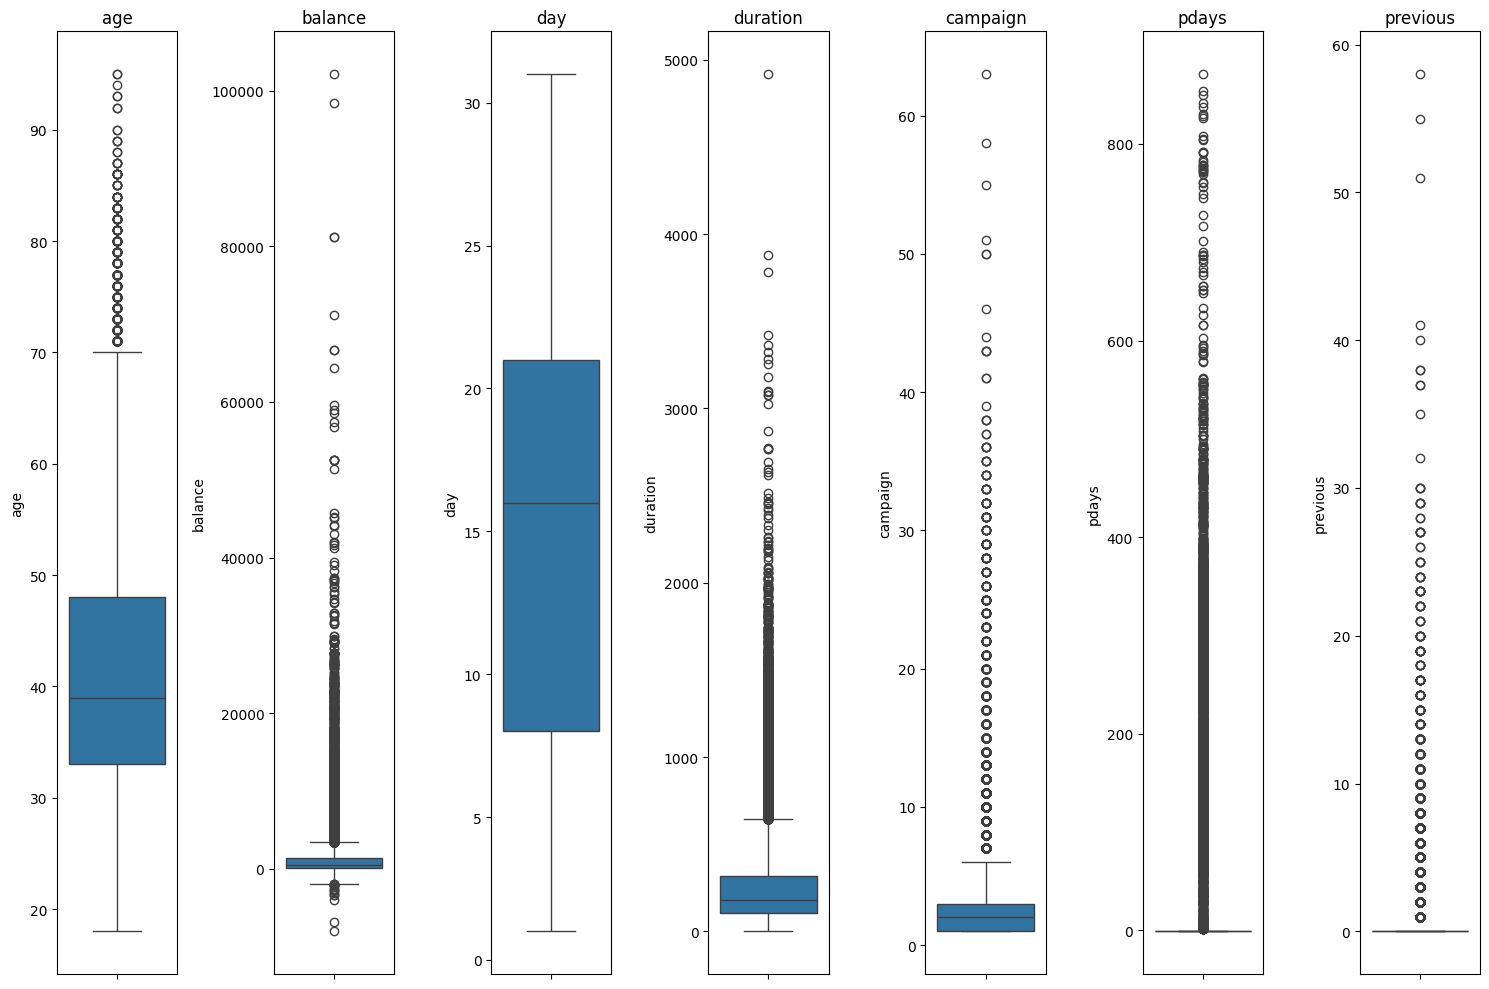

In [ ]:
#Seleccionar columnas numéricas
num_cols = data_cleaned.select_dtypes(include=np.number).columns

#Generar boxplots para cada columna
plt.figure(figsize=(15, 10))

for i, col in enumerate(num_cols, 1):
    plt.subplot(1, len(num_cols), i)
    sns.boxplot(y=data_cleaned[col])
    plt.title(col)

plt.tight_layout()
plt.show()

En este punto, así se conforma el dataframe.

In [ ]:
data_cleaned

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
1,44.0,technician,single,secondary,no,29.0,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33.0,entrepreneur,married,secondary,no,2.0,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47.0,blue-collar,married,unknown,no,1506.0,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33.0,unknown,single,unknown,no,1.0,no,no,unknown,5,may,198,1,-1,0,unknown,no
5,35.0,management,married,tertiary,no,231.0,yes,no,unknown,5,may,139,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51.0,technician,married,tertiary,no,825.0,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71.0,retired,divorced,primary,no,1729.0,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72.0,retired,married,secondary,no,5715.0,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57.0,blue-collar,married,secondary,no,668.0,no,no,telephone,17,nov,508,4,-1,0,unknown,no


## **10-Manejo de valores categóricos**

Lo siguiente es verificar cuántas categorías hay en cada columna categórica y binaria, esto con el propósito de ver si hay categorías malescritas o fuera de lo esperado que alteren a futuro el funcionamiento del modelo.

In [ ]:
#Indicar cuáles son las columnas categóricas
cols = ["job", "marital", "education", "contact", "month", "poutcome", "default", "housing", "loan"]

#Imprimir categorías de cada columna categórica
for col in cols:
  print("Categorías en",col)
  print(data_cleaned[col].unique())
  print("Cantidad de categorías:", data_cleaned[col].nunique(),"\n")


Categorías en job
['technician' 'entrepreneur' 'blue-collar' 'unknown' 'management' 'admin.'
 'services' 'retired' 'self-employed' 'unemployed' 'housemaid' 'student']
Cantidad de categorías: 12 

Categorías en marital
['single' 'married' 'divorced']
Cantidad de categorías: 3 

Categorías en education
['secondary' 'unknown' 'tertiary' 'primary']
Cantidad de categorías: 4 

Categorías en contact
['unknown' 'cellular' 'telephone']
Cantidad de categorías: 3 

Categorías en month
['may' 'jun' 'jul' 'aug' 'oct' 'nov' 'dec' 'jan' 'feb' 'mar' 'apr' 'sep']
Cantidad de categorías: 12 

Categorías en poutcome
['unknown' 'failure' 'other' 'success']
Cantidad de categorías: 4 

Categorías en default
['no' 'yes']
Cantidad de categorías: 2 

Categorías en housing
['yes' 'no']
Cantidad de categorías: 2 

Categorías en loan
['no' 'yes']
Cantidad de categorías: 2 



Se observa que hay varias categorías en cada columna categórica y en las binarias no hay valores fuera de lo ordinario, además de que se observa que en varias columnas existe la categoría "unknown", lo cual significa que existen datos desconocidos, los cuales se deben analizar en la transformación del dataframe.

## **11-Tabla de contingencia y matriz de correlación**

Primero se opta por crear tablas de contingencia para analizar las variables categóricas y la matriz de correlación para analizar las variables numéricas. Esto es para verificar posibles relaciones entre variables y descartar algunas que no aporten al modelo.

Las tablas de contingencia se hicieron con base en las relaciones entre todas las variables categóricas.

Tabla de contingencia: job × marital
Chi2 = 3835.0952
P-value = 0.0000


marital,divorced,married,single
job,,,
admin.,750,2692,1727
blue-collar,750,6967,2013
entrepreneur,178,1070,237
housemaid,184,912,144
management,1111,5398,2946
retired,425,1729,108
self-employed,140,993,446
services,549,2406,1198
student,6,54,877


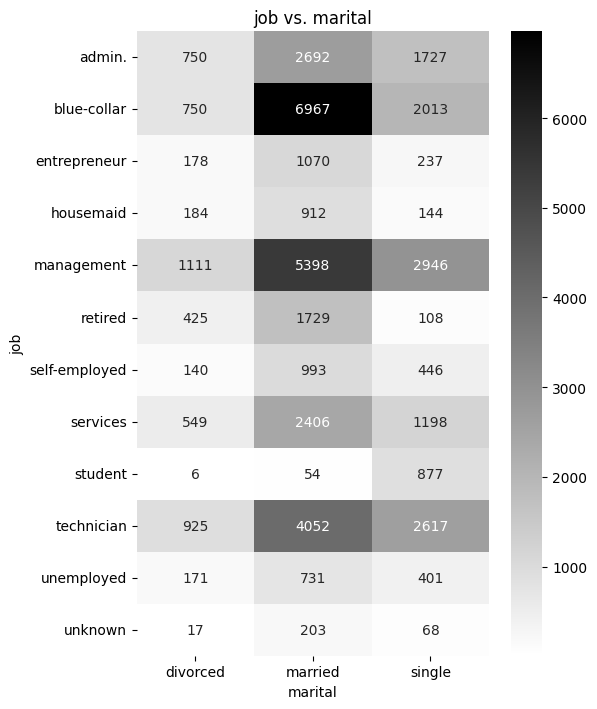

Tabla de contingencia: job × education
Chi2 = 28477.4080
P-value = 0.0000


education,primary,secondary,tertiary,unknown
job,,,,
admin.,209,4218,571,171
blue-collar,3758,5371,149,452
entrepreneur,183,542,684,76
housemaid,627,395,173,45
management,294,1121,7798,242
retired,794,983,366,119
self-employed,130,577,833,39
services,344,3457,202,150
student,44,508,222,163


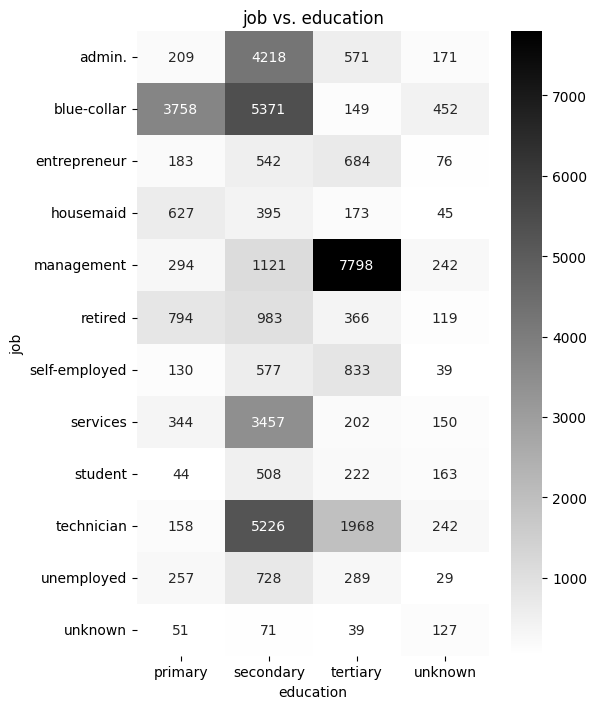

Tabla de contingencia: job × default
Chi2 = 58.3490
P-value = 0.0000


default,no,yes
job,,
admin.,5095,74
blue-collar,9529,201
entrepreneur,1431,54
housemaid,1218,22
management,9291,164
retired,2236,26
self-employed,1546,33
services,4078,75
student,934,3


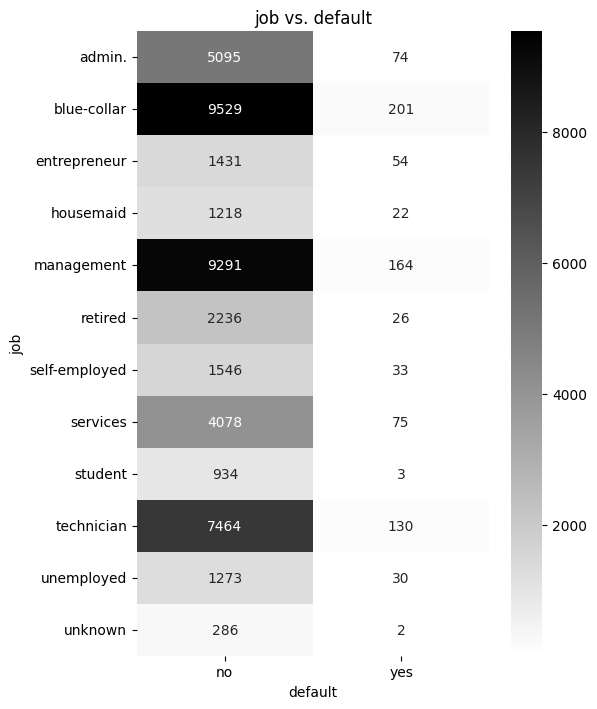

Tabla de contingencia: job × housing
Chi2 = 3587.3305
P-value = 0.0000


housing,no,yes
job,,
admin.,1989,3180
blue-collar,2684,7046
entrepreneur,617,868
housemaid,842,398
management,4780,4675
retired,1772,490
self-employed,814,765
services,1388,2765
student,688,249


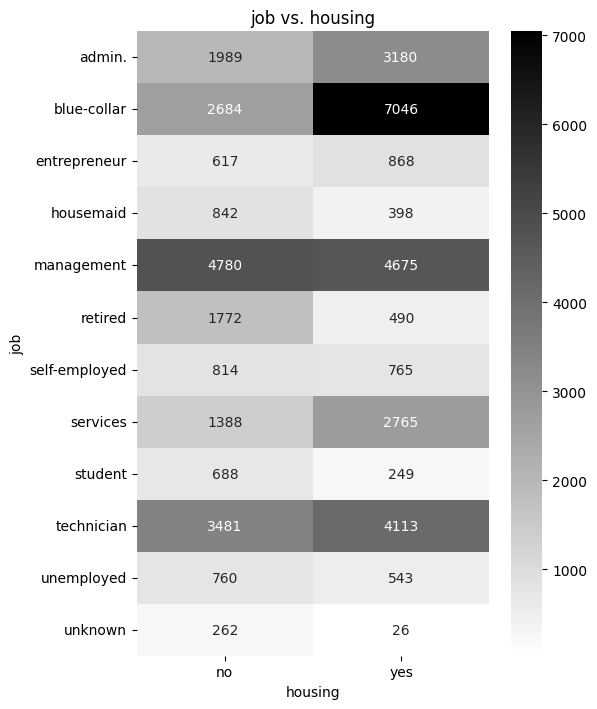

Tabla de contingencia: job × loan
Chi2 = 511.7262
P-value = 0.0000


loan,no,yes
job,,
admin.,4178,991
blue-collar,8046,1684
entrepreneur,1130,355
housemaid,1088,152
management,8202,1253
retired,1953,309
self-employed,1350,229
services,3317,836
student,925,12


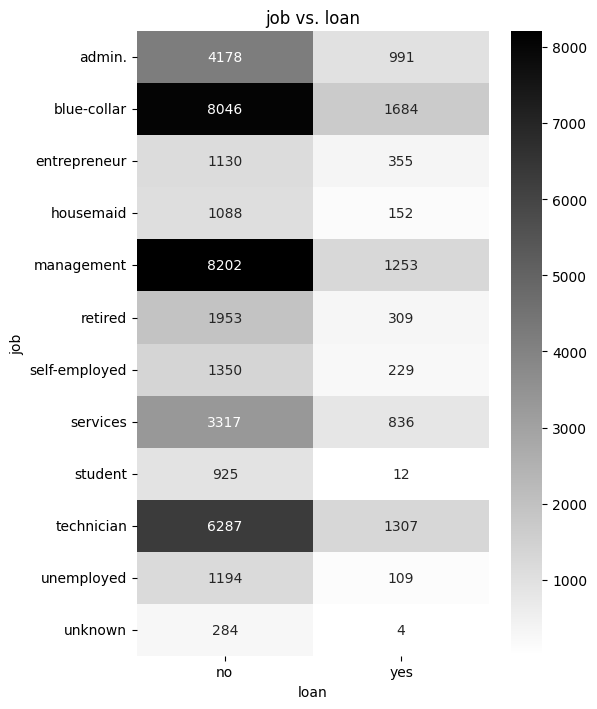

Tabla de contingencia: job × contact
Chi2 = 2047.3945
P-value = 0.0000


contact,cellular,telephone,unknown
job,,,
admin.,3354,289,1526
blue-collar,5156,611,3963
entrepreneur,954,87,444
housemaid,748,151,341
management,7020,471,1964
retired,1369,405,488
self-employed,1084,98,397
services,2498,228,1427
student,696,99,142


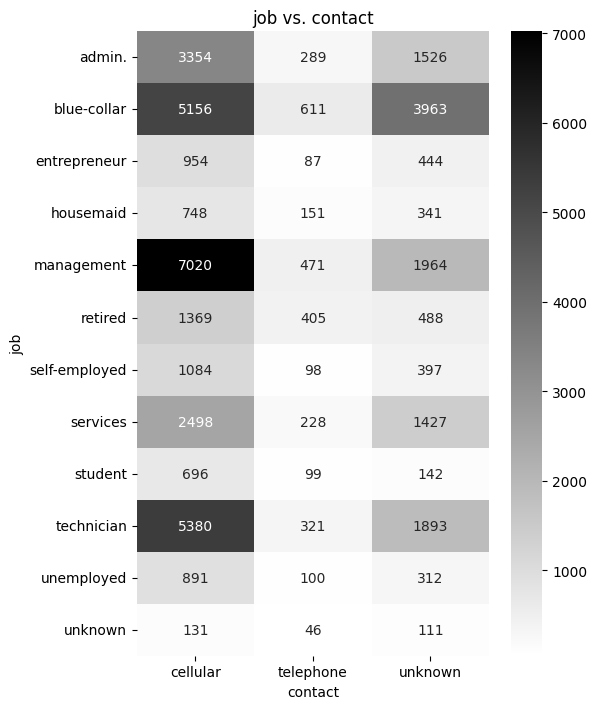

Tabla de contingencia: job × month
Chi2 = 6047.1819
P-value = 0.0000


month,apr,aug,dec,feb,jan,jul,jun,mar,may,nov,oct,sep
job,,,,,,,,,,,,
admin.,404,361,23,314,178,871,590,74,1749,422,105,78
blue-collar,753,609,12,403,185,1396,1280,24,4376,602,59,31
entrepreneur,70,82,3,87,38,302,216,2,414,247,12,12
housemaid,51,261,6,51,32,282,272,13,151,81,26,14
management,554,1978,51,554,290,1351,925,144,2166,1096,177,169
retired,145,391,41,168,89,339,303,66,353,136,134,97
self-employed,86,213,6,105,53,247,213,16,366,235,26,13
services,280,267,15,210,135,776,517,20,1589,303,20,21
student,89,110,17,93,39,72,85,39,253,51,39,50


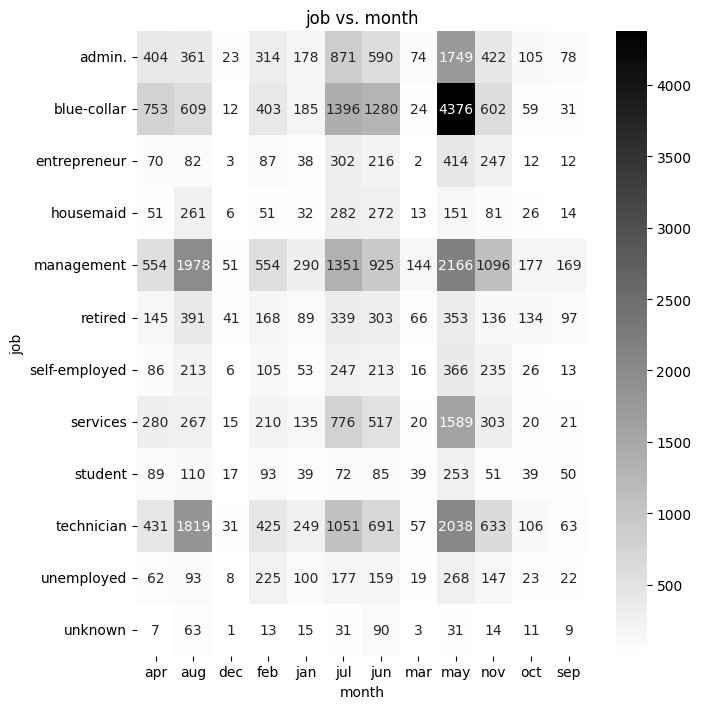

Tabla de contingencia: job × poutcome
Chi2 = 559.8663
P-value = 0.0000


poutcome,failure,other,success,unknown
job,,,,
admin.,643,241,204,4081
blue-collar,1068,401,148,8113
entrepreneur,164,39,22,1260
housemaid,97,26,29,1088
management,1044,392,387,7632
retired,229,83,174,1776
self-employed,165,61,55,1298
services,444,177,85,3447
student,117,81,87,652


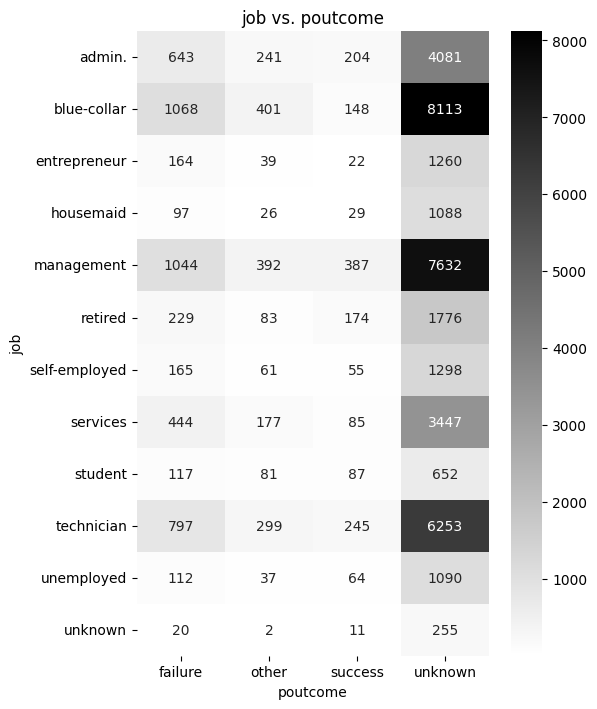

Tabla de contingencia: job × y
Chi2 = 832.1422
P-value = 0.0000


y,no,yes
job,,
admin.,4538,631
blue-collar,9022,708
entrepreneur,1362,123
housemaid,1131,109
management,8154,1301
retired,1747,515
self-employed,1392,187
services,3784,369
student,669,268


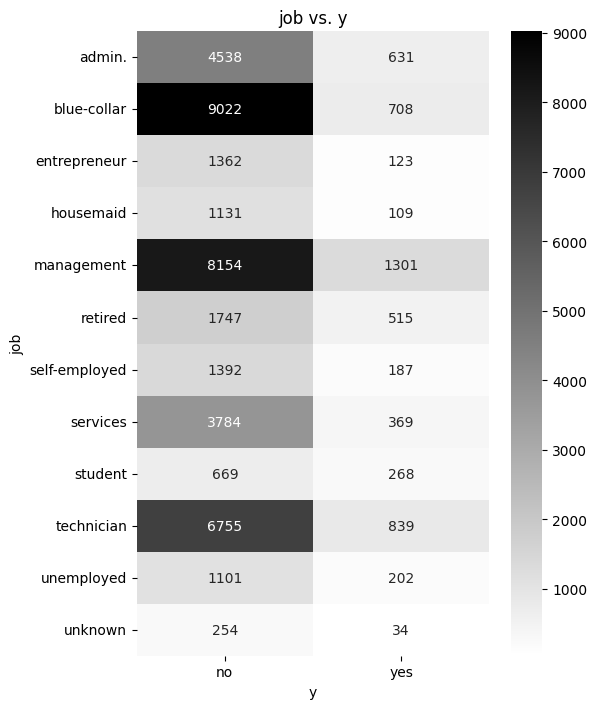

Tabla de contingencia: marital × education
Chi2 = 1336.1530
P-value = 0.0000


education,primary,secondary,tertiary,unknown
marital,,,,
divorced,752,2815,1470,169
married,5244,13769,7035,1159
single,853,6613,4789,527


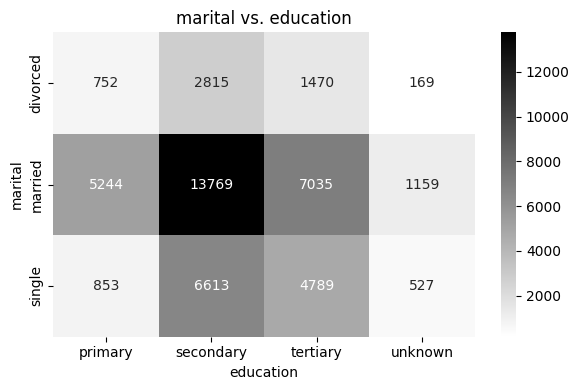

Tabla de contingencia: marital × default
Chi2 = 16.0076
P-value = 0.0003


default,no,yes
marital,,
divorced,5079,127
married,26759,448
single,12543,239


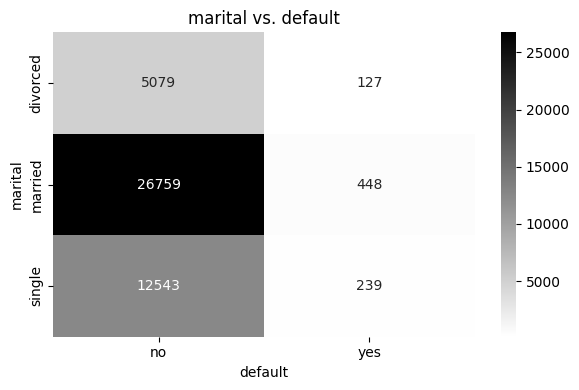

Tabla de contingencia: marital × housing
Chi2 = 19.2960
P-value = 0.0001


housing,no,yes
marital,,
divorced,2300,2906
married,11892,15315
single,5885,6897


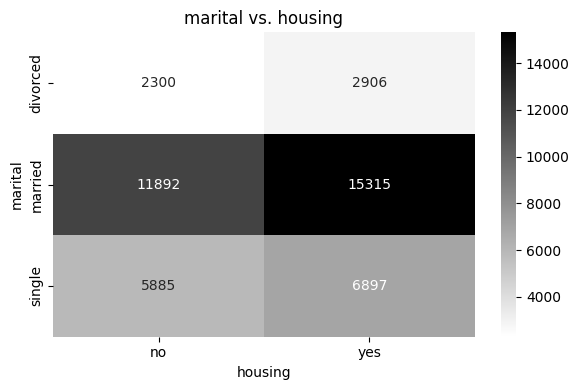

Tabla de contingencia: marital × loan
Chi2 = 123.0183
P-value = 0.0000


loan,no,yes
marital,,
divorced,4285,921
married,22547,4660
single,11122,1660


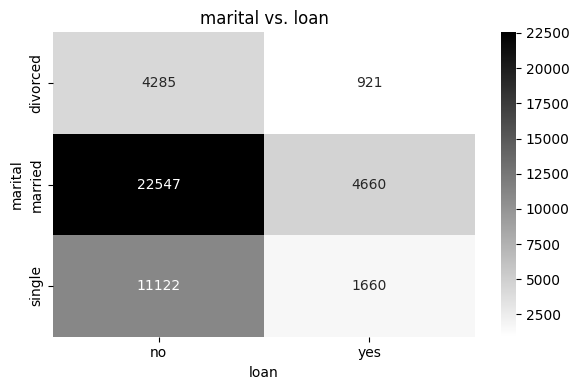

Tabla de contingencia: marital × contact
Chi2 = 184.3625
P-value = 0.0000


contact,cellular,telephone,unknown
marital,,,
divorced,3326,271,1609
married,17166,2015,8026
single,8789,620,3373


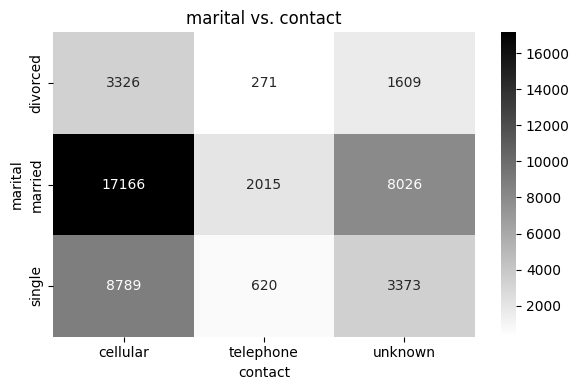

Tabla de contingencia: marital × month
Chi2 = 473.1603
P-value = 0.0000


month,apr,aug,dec,feb,jan,jul,jun,mar,may,nov,oct,sep
marital,,,,,,,,,,,,
divorced,270,582,22,301,167,878,670,48,1640,495,79,54
married,1744,4133,121,1421,699,4347,3325,246,7907,2529,417,318
single,918,1532,71,926,537,1670,1346,183,4207,943,242,207


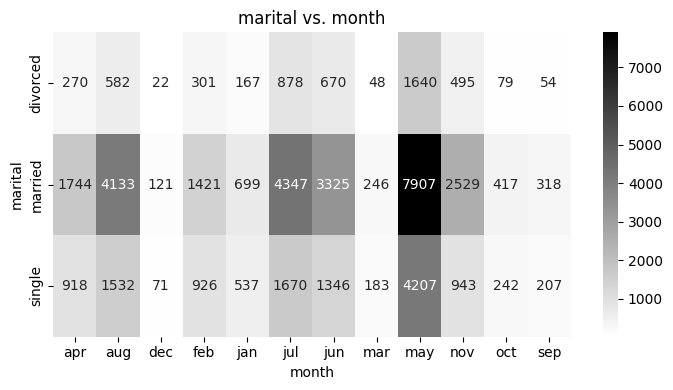

Tabla de contingencia: marital × poutcome
Chi2 = 77.0180
P-value = 0.0000


poutcome,failure,other,success,unknown
marital,,,,
divorced,556,223,152,4275
married,2918,986,836,22467
single,1426,630,523,10203


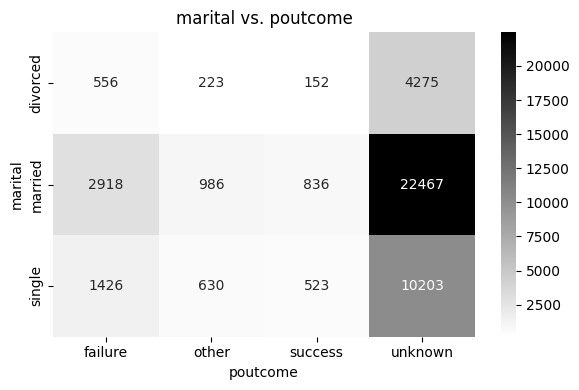

Tabla de contingencia: marital × y
Chi2 = 196.0223
P-value = 0.0000


y,no,yes
marital,,
divorced,4584,622
married,24453,2754
single,10872,1910


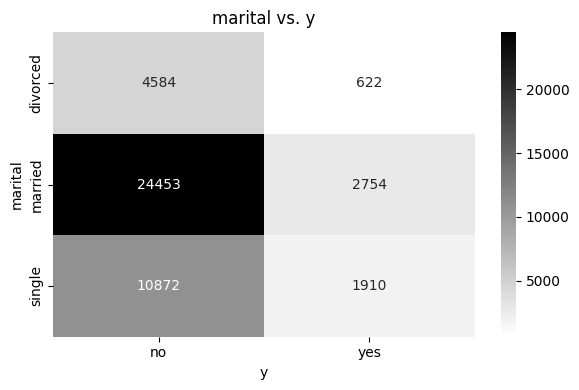

Tabla de contingencia: education × default
Chi2 = 11.7687
P-value = 0.0082


default,no,yes
education,,
primary,6722,127
secondary,22739,458
tertiary,13097,197
unknown,1823,32


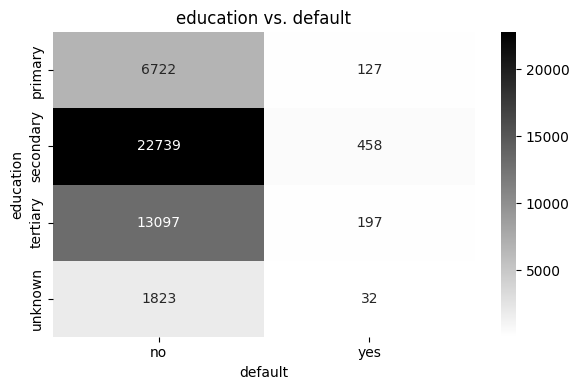

Tabla de contingencia: education × housing
Chi2 = 645.5229
P-value = 0.0000


housing,no,yes
education,,
primary,2957,3892
secondary,9162,14035
tertiary,6921,6373
unknown,1037,818


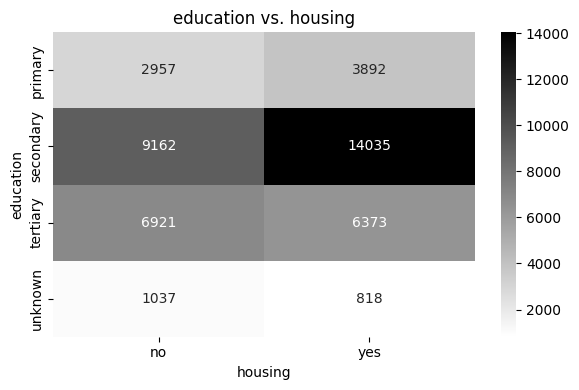

Tabla de contingencia: education × loan
Chi2 = 290.5935
P-value = 0.0000


loan,no,yes
education,,
primary,5825,1024
secondary,18896,4301
tertiary,11511,1783
unknown,1722,133


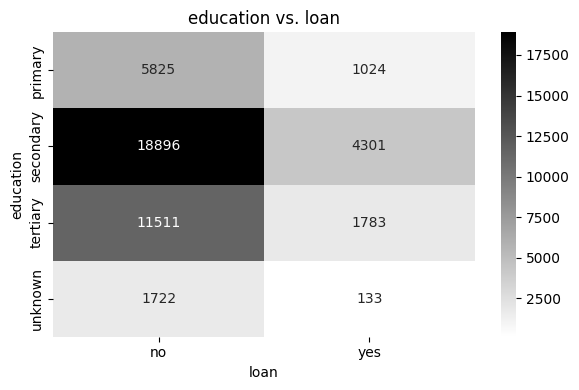

Tabla de contingencia: education × contact
Chi2 = 1364.1160
P-value = 0.0000


contact,cellular,telephone,unknown
education,,,
primary,3568,722,2559
secondary,14686,1365,7146
tertiary,10037,629,2628
unknown,990,190,675


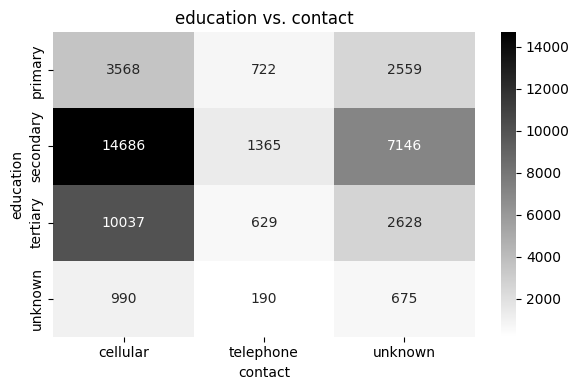

Tabla de contingencia: education × month
Chi2 = 1646.0224
P-value = 0.0000


month,apr,aug,dec,feb,jan,jul,jun,mar,may,nov,oct,sep
education,,,,,,,,,,,,
primary,426,682,23,341,159,1083,1113,47,2351,454,97,73
secondary,1569,2670,101,1333,706,3682,2595,185,7908,1907,312,229
tertiary,827,2718,76,868,462,1856,1318,219,2941,1487,287,235
unknown,110,177,14,106,76,274,315,26,554,119,42,42


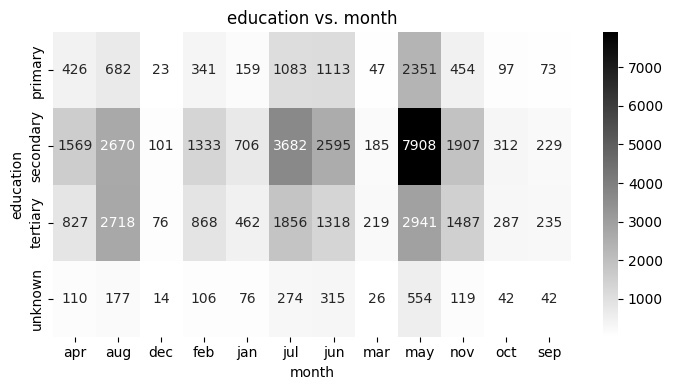

Tabla de contingencia: education × poutcome
Chi2 = 172.4109
P-value = 0.0000


poutcome,failure,other,success,unknown
education,,,,
primary,643,244,133,5829
secondary,2588,987,675,18947
tertiary,1492,543,622,10637
unknown,177,65,81,1532


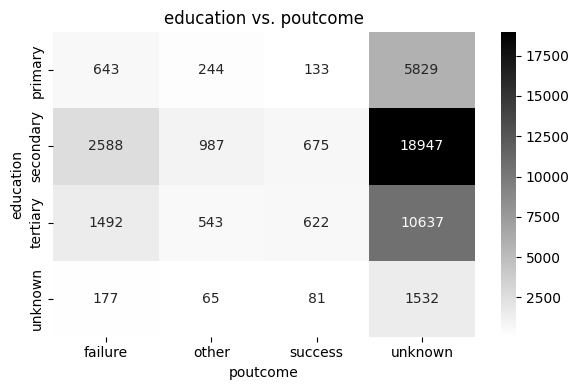

Tabla de contingencia: education × y
Chi2 = 239.2160
P-value = 0.0000


y,no,yes
education,,
primary,6258,591
secondary,20749,2448
tertiary,11299,1995
unknown,1603,252


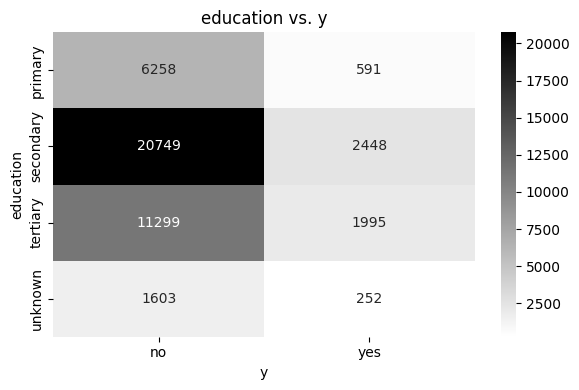

Tabla de contingencia: default × housing
Chi2 = 1.6229
P-value = 0.2027


housing,no,yes
default,,
no,19697,24684
yes,380,434


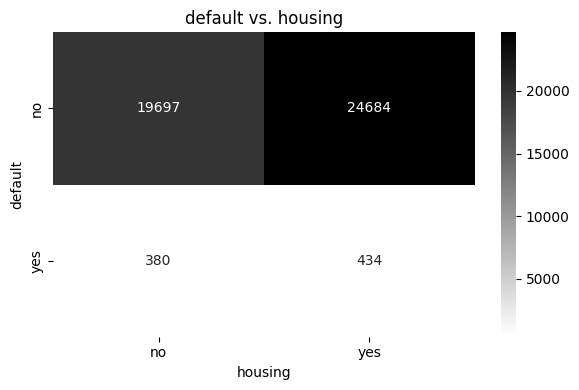

Tabla de contingencia: default × loan
Chi2 = 268.9787
P-value = 0.0000


loan,no,yes
default,,
no,37441,6940
yes,513,301


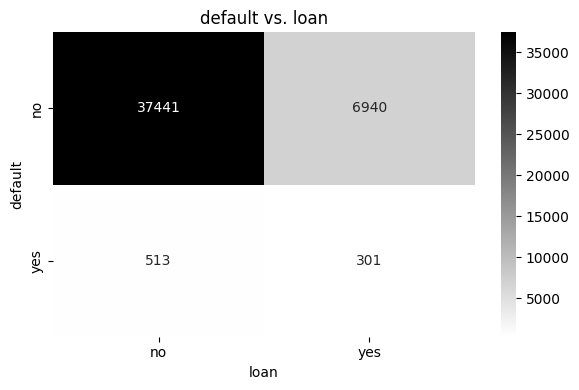

Tabla de contingencia: default × contact
Chi2 = 26.5888
P-value = 0.0000


contact,cellular,telephone,unknown
default,,,
no,28782,2879,12720
yes,499,27,288


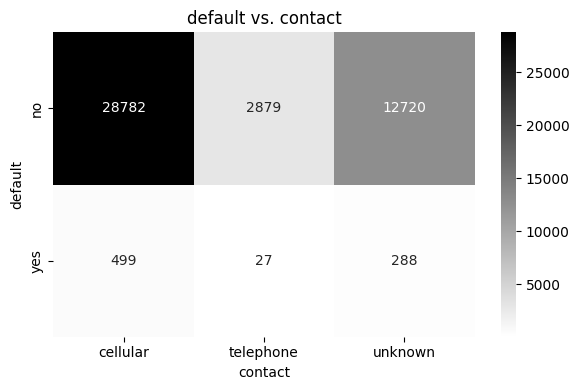

Tabla de contingencia: default × month
Chi2 = 155.8459
P-value = 0.0000


month,apr,aug,dec,feb,jan,jul,jun,mar,may,nov,oct,sep
default,,,,,,,,,,,,
no,2921,6150,214,2613,1385,6675,5230,477,13515,3885,738,578
yes,11,97,0,35,18,220,111,0,239,82,0,1


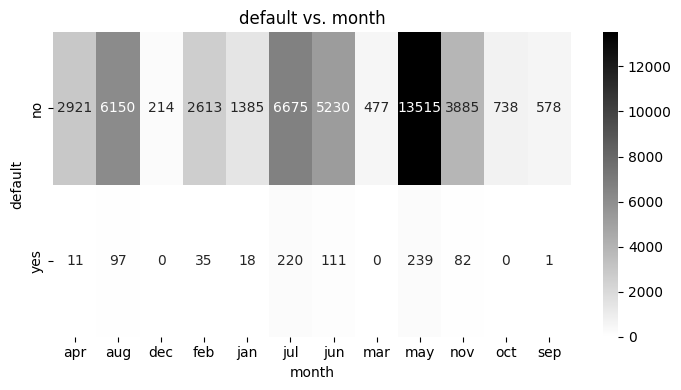

Tabla de contingencia: default × poutcome
Chi2 = 73.6328
P-value = 0.0000


poutcome,failure,other,success,unknown
default,,,,
no,4861,1823,1509,36188
yes,39,16,2,757


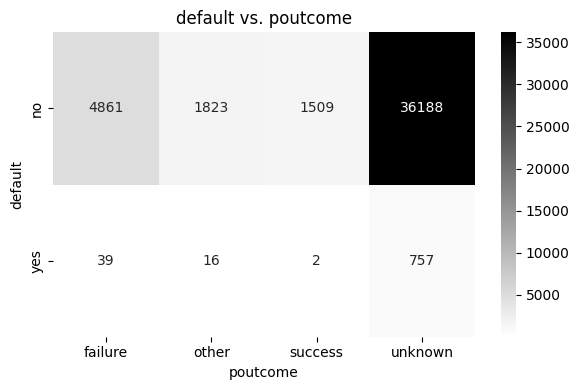

Tabla de contingencia: default × y
Chi2 = 22.0910
P-value = 0.0000


y,no,yes
default,,
no,39147,5234
yes,762,52


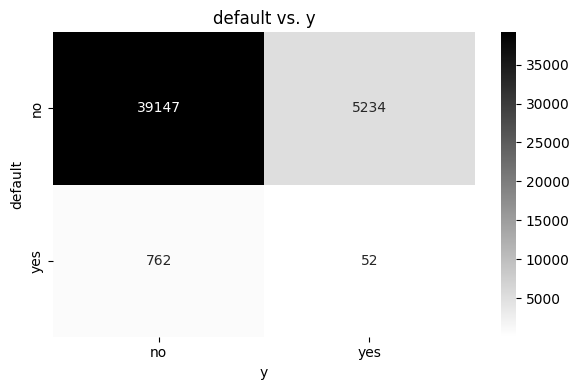

Tabla de contingencia: housing × loan
Chi2 = 77.5321
P-value = 0.0000


loan,no,yes
housing,,
no,17202,2875
yes,20752,4366


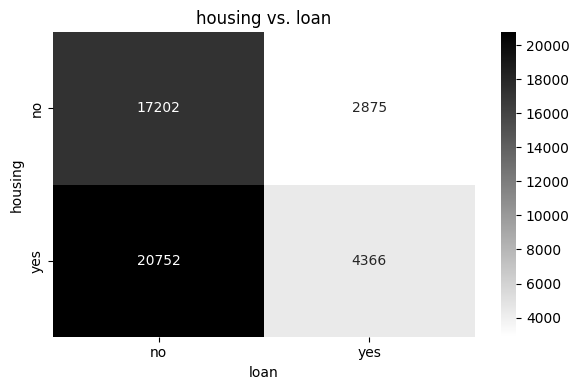

Tabla de contingencia: housing × contact
Chi2 = 2057.4625
P-value = 0.0000


contact,cellular,telephone,unknown
housing,,,
no,14679,1736,3662
yes,14602,1170,9346


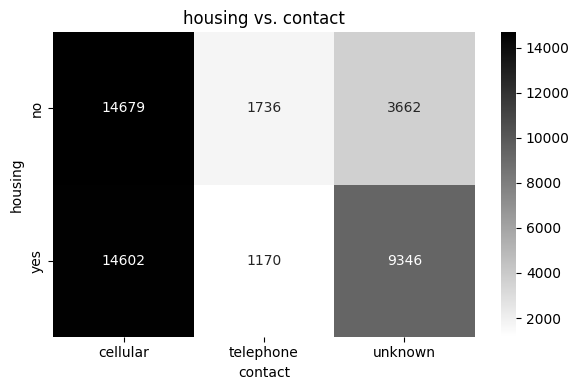

Tabla de contingencia: housing × month
Chi2 = 11487.9662
P-value = 0.0000


month,apr,aug,dec,feb,jan,jul,jun,mar,may,nov,oct,sep
housing,,,,,,,,,,,,
no,863,5144,173,1517,882,3557,3114,364,1689,1753,571,450
yes,2069,1103,41,1131,521,3338,2227,113,12065,2214,167,129


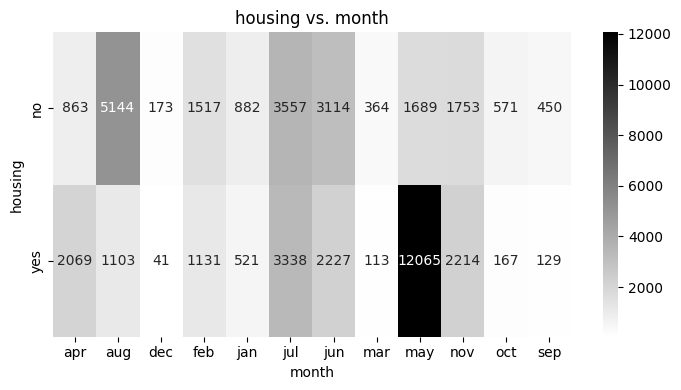

Tabla de contingencia: housing × poutcome
Chi2 = 927.2705
P-value = 0.0000


poutcome,failure,other,success,unknown
housing,,,,
no,1430,641,1040,16966
yes,3470,1198,471,19979


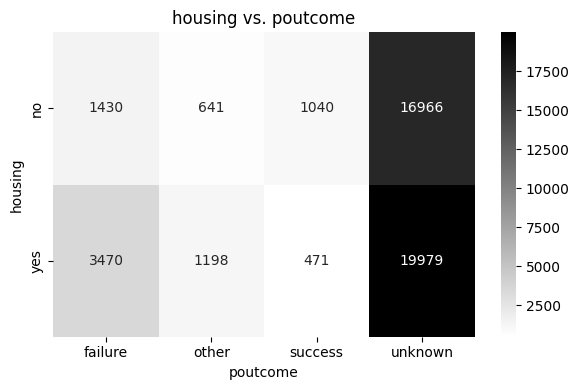

Tabla de contingencia: housing × y
Chi2 = 871.7308
P-value = 0.0000


y,no,yes
housing,,
no,16726,3351
yes,23183,1935


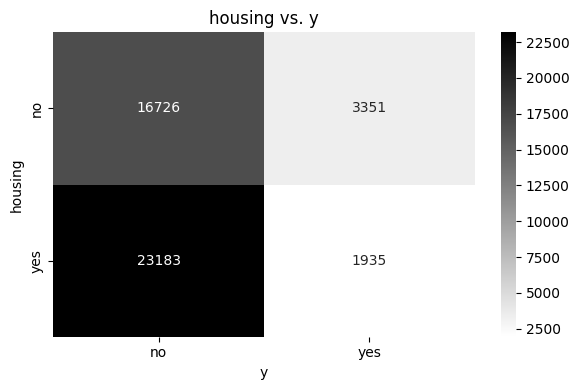

Tabla de contingencia: loan × contact
Chi2 = 11.9611
P-value = 0.0025


contact,cellular,telephone,unknown
loan,,,
no,24482,2494,10978
yes,4799,412,2030


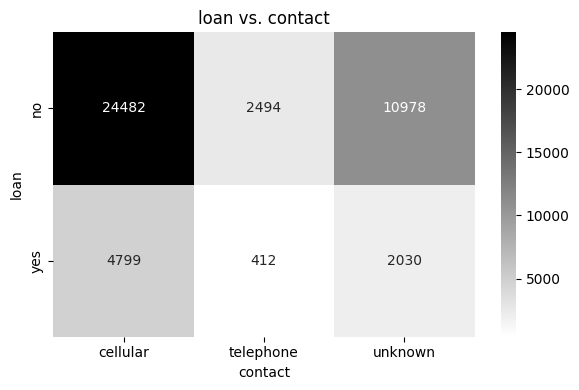

Tabla de contingencia: loan × month
Chi2 = 1511.1226
P-value = 0.0000


month,apr,aug,dec,feb,jan,jul,jun,mar,may,nov,oct,sep
loan,,,,,,,,,,,,
no,2574,5643,203,2258,1191,4790,4607,451,11763,3242,683,549
yes,358,604,11,390,212,2105,734,26,1991,725,55,30


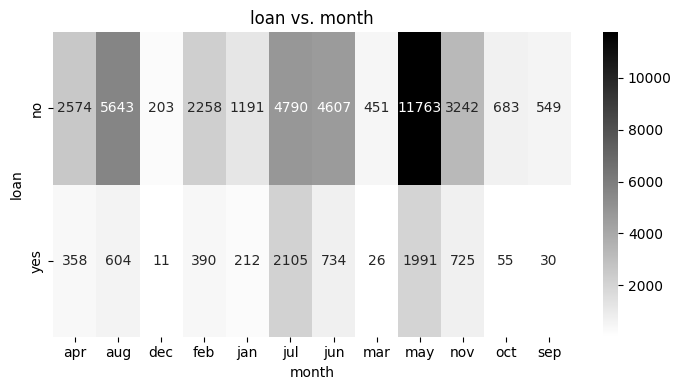

Tabla de contingencia: loan × poutcome
Chi2 = 137.9060
P-value = 0.0000


poutcome,failure,other,success,unknown
loan,,,,
no,4126,1574,1429,30825
yes,774,265,82,6120


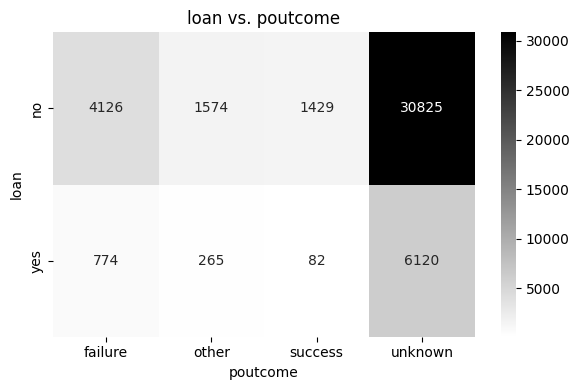

Tabla de contingencia: loan × y
Chi2 = 210.2818
P-value = 0.0000


y,no,yes
loan,,
no,33151,4803
yes,6758,483


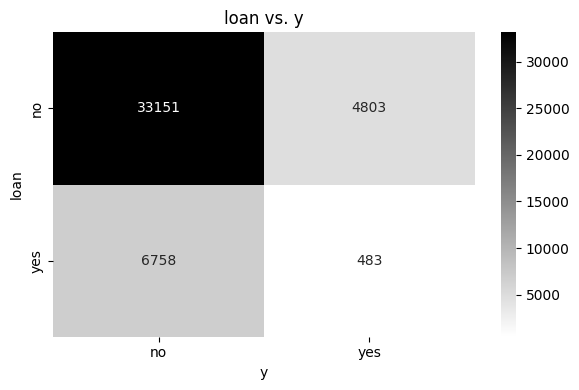

Tabla de contingencia: contact × month
Chi2 = 23702.1055
P-value = 0.0000


month,apr,aug,dec,feb,jan,jul,jun,mar,may,nov,oct,sep
contact,,,,,,,,,,,,
cellular,2727,5950,174,2361,1265,5767,729,417,5331,3537,557,466
telephone,199,246,37,274,129,852,80,53,460,379,131,66
unknown,6,51,3,13,9,276,4532,7,7963,51,50,47


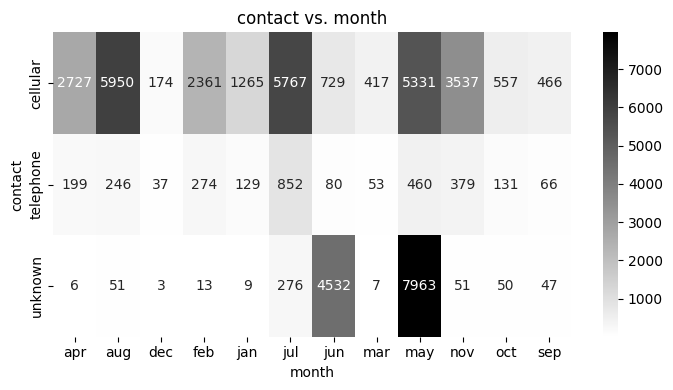

Tabla de contingencia: contact × poutcome
Chi2 = 3888.0466
P-value = 0.0000


poutcome,failure,other,success,unknown
contact,,,,
cellular,4528,1636,1385,21732
telephone,341,176,114,2275
unknown,31,27,12,12938


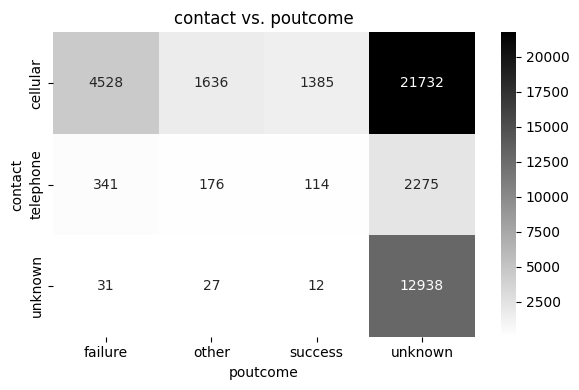

Tabla de contingencia: contact × y
Chi2 = 1032.9714
P-value = 0.0000


y,no,yes
contact,,
cellular,24915,4366
telephone,2516,390
unknown,12478,530


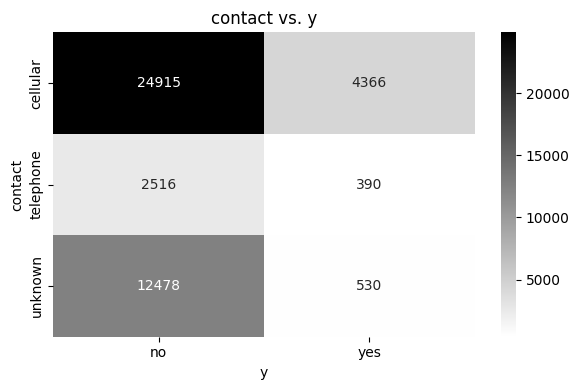

Tabla de contingencia: month × poutcome
Chi2 = 6226.9693
P-value = 0.0000


poutcome,failure,other,success,unknown
month,,,,
apr,737,252,129,1814
aug,237,86,207,5717
dec,41,26,51,96
feb,529,251,143,1725
jan,289,145,64,905
jul,109,46,99,6641
jun,133,70,118,5020
mar,75,38,60,304
may,1687,591,236,11240


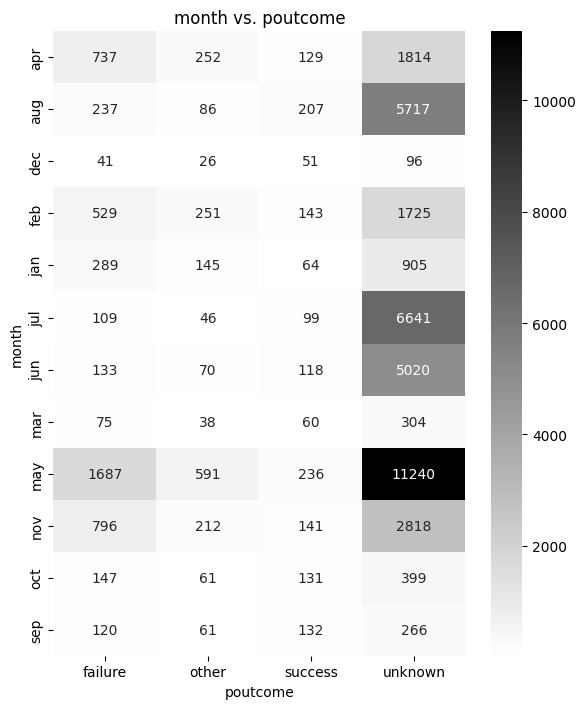

Tabla de contingencia: month × y
Chi2 = 3062.2950
P-value = 0.0000


y,no,yes
month,,
apr,2355,577
aug,5559,688
dec,114,100
feb,2207,441
jan,1261,142
jul,6268,627
jun,4795,546
mar,229,248
may,12829,925


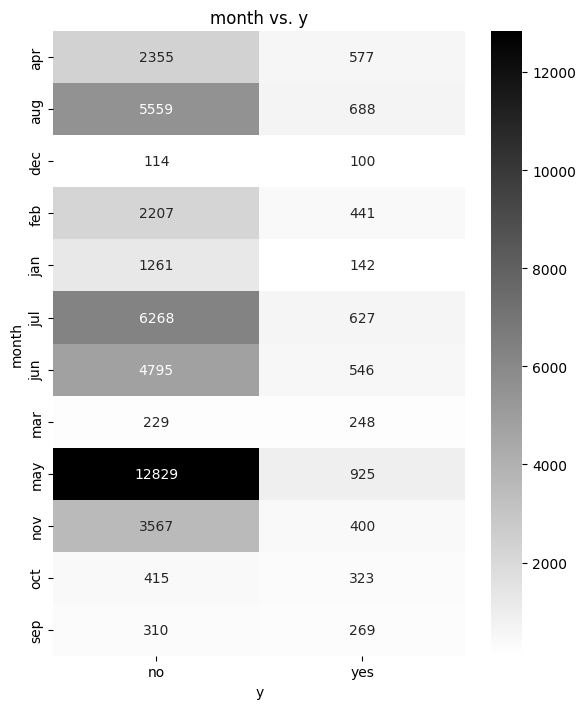

Tabla de contingencia: poutcome × y
Chi2 = 4392.5685
P-value = 0.0000


y,no,yes
poutcome,,
failure,4283,617
other,1532,307
success,533,978
unknown,33561,3384


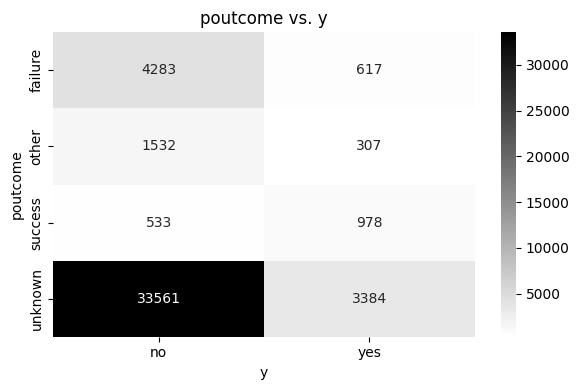

RESUMEN CHI-CUADRADO (ordenado por Chi2 descendente)


,Variable_A,Variable_B,Chi2,P-value
0,job,education,28477.407995,0.000000e+00
1,contact,month,23702.105546,0.000000e+00
2,housing,month,11487.966187,0.000000e+00
3,month,poutcome,6226.969284,0.000000e+00
4,job,month,6047.181898,0.000000e+00
5,poutcome,y,4392.568475,0.000000e+00
6,contact,poutcome,3888.046556,0.000000e+00
7,job,marital,3835.095241,0.000000e+00
8,job,housing,3587.330523,0.000000e+00
9,month,y,3062.294963,0.000000e+00


In [ ]:
import pandas as pd
from scipy.stats import chi2_contingency
from IPython.display import display

def show_all_crosstabs_chi2_with_summary(df: pd.DataFrame, include_bool=True):
    # Detectar columnas categóricas
    dtypes = ["object","category","bool"]
    cat_cols = df.select_dtypes(include=dtypes).columns.tolist()

    if not cat_cols:
        print("No se encontraron columnas categóricas")
        return

    results = []  #Lista para almacenar los resultados de Chi

    # Generar pares únicos (A×B)
    for i in range(len(cat_cols)):
        for j in range(i + 1, len(cat_cols)):
            col_a, col_b = cat_cols[i], cat_cols[j]

            # Crear tabla de contingencia
            tabla = pd.crosstab(df[col_a], df[col_b])

            if tabla.empty:
                continue  # Saltar pares vacíos

            # Calcular Chi
            chi2, p, dof, expected = chi2_contingency(tabla)

            print(f"Tabla de contingencia: {col_a} × {col_b}")
            print(f"Chi2 = {chi2:.4f}")
            print(f"P-value = {p:.4f}")

            # Mostrar tabla en formato nativo (Jupyter/Colab)
            display(tabla)

            # Heatmap
            plt.figure(figsize=(max(6, 0.6*tabla.shape[1]), max(4, 0.6*tabla.shape[0])))
            sns.heatmap(tabla, annot=(tabla.size <= 400), fmt="d", cmap="binary")
            plt.title(f"{col_a} vs. {col_b}")
            plt.xlabel(col_b); plt.ylabel(col_a)
            plt.tight_layout()
            plt.show()

            # Guardar resultados para el resumen
            results.append({
                "Variable_A": col_a,
                "Variable_B": col_b,
                "Chi2": chi2,
                "P-value": p
            })

    # 3) Crear resumen ordenado por Chi² (descendente)
    if results:
        resumen = (
            pd.DataFrame(results)
            .sort_values("Chi2", ascending=False)
            .reset_index(drop=True)
        )
        print("RESUMEN CHI-CUADRADO (ordenado por Chi2 descendente)")
        display(resumen)
    else:
        print("No se generaron resultados")

show_all_crosstabs_chi2_with_summary(data_cleaned)


Con el empleo de Chi$^2$ se muestran correlaciones fuertes entre job y education (lo cual dice que según el grado de estudios tenga el cliente, éste tiene más probabilidad de entrar en cierta categoría de trabajo), y contact y month, indicando que en ciertos meses hubieron más contactos con los clientes.

Sin embargo, para la variable que se busca predecir (y), ésta está más relacionada con la columna poutcome, es decir, si el cliente aceptó en el contacto obtener un producto bancario (poutcome="success"), el cliente tuvo más posibilidades de adquirir un producto bancario en la práctica. Sobre el resto de las columnas hay una correlación moderada a débil, con excepción de la columna "default", donde hay una correlación prácticamente inexistente.

Pero también se visualiza que el dataset está muy desbalanceado, al tener muchos más "no" que "yes" en la variable objetivo.

Los datos unknown representan su propia categoría en todas las columnas, no sería adecuado borrarlos.

Se realiza esta matriz de correlación entre variables numéricas.

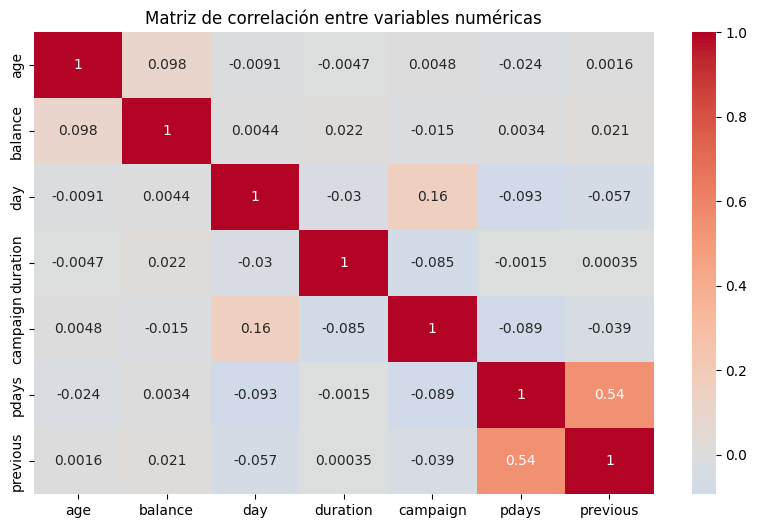

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

numeric_cols = data_cleaned.select_dtypes(include="number").columns

#Calcular matriz de correlación
corr_matrix = data_cleaned[numeric_cols].corr()

#Visualizar matriz de correlación
plt.figure(figsize=(10,6))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", center=0)
plt.title("Matriz de correlación entre variables numéricas")
plt.show()


In [ ]:
data_cleaned

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
1,44.0,technician,single,secondary,no,29.0,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33.0,entrepreneur,married,secondary,no,2.0,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47.0,blue-collar,married,unknown,no,1506.0,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33.0,unknown,single,unknown,no,1.0,no,no,unknown,5,may,198,1,-1,0,unknown,no
5,35.0,management,married,tertiary,no,231.0,yes,no,unknown,5,may,139,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51.0,technician,married,tertiary,no,825.0,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71.0,retired,divorced,primary,no,1729.0,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72.0,retired,married,secondary,no,5715.0,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57.0,blue-collar,married,secondary,no,668.0,no,no,telephone,17,nov,508,4,-1,0,unknown,no


## **12-Eliminación de columnas y transformación de datos**

Con la tabla de contingencia, matriz de correlación y una nueva inspección visual a la tabla, ya será posible determinar qué cambios se pueden hacer:
* Transformación de la columna pdays: Los valores -1 son un problema, porque el modelo pensaría que existen contactos en el futuro (que ha pasado -1 día). Para manejar los valores -1 es más conveniente crear una nueva columna booleana donde se indique si hubo contacto previo con el cliente o no y otra con la duración en días (y dejar los valores -1 como nulos, al cabo y ya hay una fuerte correlación). Cabe recordar que -1 significa que el cliente no había sido contactado anteriormente.
* Eliminación de la columna duration: Nunca se conocerá la duración de una llamada antes de iniciar y al finalizar alguna ya se conocerá el valor de y. Además, es la columna con menor correlación con el resto de variables numéricas. Por lo tanto se puede eliminar.
* Eliminación de la columna default: Esta columna tiene muy poca relación con la variable objetivo (y), además de que la inmensa mayoría de los datos son "no".
* Eliminación de la columna day: day sólo dice el día de la fecha en que se realizó el contacto con el cliente, lo cual no tiene relación directa con y. Por lo tanto, no aporta información relevante.

In [ ]:
# Eliminar columnas Id y duration
data_cleaned = data_cleaned.drop(columns=["duration", "default", "day"])
data_cleaned

,age,job,marital,education,balance,housing,loan,contact,month,campaign,pdays,previous,poutcome,y
1,44.0,technician,single,secondary,29.0,yes,no,unknown,may,1,-1,0,unknown,no
2,33.0,entrepreneur,married,secondary,2.0,yes,yes,unknown,may,1,-1,0,unknown,no
3,47.0,blue-collar,married,unknown,1506.0,yes,no,unknown,may,1,-1,0,unknown,no
4,33.0,unknown,single,unknown,1.0,no,no,unknown,may,1,-1,0,unknown,no
5,35.0,management,married,tertiary,231.0,yes,no,unknown,may,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51.0,technician,married,tertiary,825.0,no,no,cellular,nov,3,-1,0,unknown,yes
45207,71.0,retired,divorced,primary,1729.0,no,no,cellular,nov,2,-1,0,unknown,yes
45208,72.0,retired,married,secondary,5715.0,no,no,cellular,nov,5,184,3,success,yes
45209,57.0,blue-collar,married,secondary,668.0,no,no,telephone,nov,4,-1,0,unknown,no


Se transforma la columna pdays para un mejor manejo del modelo.

In [ ]:
import numpy as np
# Crear variable binaria: fue contactado antes
data_cleaned["contacted_before"] = (data_cleaned["pdays"] != -1).astype(bool)

data_cleaned = data_cleaned.drop(columns=["pdays"])


print(data_cleaned["contacted_before"].value_counts())
print(data_cleaned.dtypes["contacted_before"])

pd.set_option("display.max_columns", None)
data_cleaned


contacted_before
False    36940
True      8255
Name: count, dtype: int64
bool


,age,job,marital,education,balance,housing,loan,contact,month,campaign,previous,poutcome,y,contacted_before
1,44.0,technician,single,secondary,29.0,yes,no,unknown,may,1,0,unknown,no,False
2,33.0,entrepreneur,married,secondary,2.0,yes,yes,unknown,may,1,0,unknown,no,False
3,47.0,blue-collar,married,unknown,1506.0,yes,no,unknown,may,1,0,unknown,no,False
4,33.0,unknown,single,unknown,1.0,no,no,unknown,may,1,0,unknown,no,False
5,35.0,management,married,tertiary,231.0,yes,no,unknown,may,1,0,unknown,no,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51.0,technician,married,tertiary,825.0,no,no,cellular,nov,3,0,unknown,yes,False
45207,71.0,retired,divorced,primary,1729.0,no,no,cellular,nov,2,0,unknown,yes,False
45208,72.0,retired,married,secondary,5715.0,no,no,cellular,nov,5,3,success,yes,True
45209,57.0,blue-collar,married,secondary,668.0,no,no,telephone,nov,4,0,unknown,no,False


Lo siguiente es darle formato a los valores categóricos. En lugar de manejar los valores categóricos como texto, se convirtieron a booleano, donde se crean columnas con las categorías y se indica con True/1 si pertenece a tal categoría o False/0 si no es así. Esto mediante get_dummies.

Esto se realiza para que el modelo de regresión logístico interprete correctamente los datos. De lo contrario scikit-learn no leerá los datos y aparecerá un error (sólo se aceptan valores numéricos).

Además, se usó drop_first=True para evitar colinealidades, donde dos variables aportarían información casi idéntica al deducirse una de ota y existiría un sesgo en la inferencia de datos.

In [ ]:
#Uso de One-hot encoding
data_cleaned=pd.get_dummies(data_cleaned,columns=["job","marital","education","housing","loan","contact","month","poutcome"], drop_first=True)

Este es el resultado. Se pasaron de 14 columnas en el dataframe a 40.

In [ ]:
data_cleaned

,age,balance,campaign,previous,y,contacted_before,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,marital_married,marital_single,education_secondary,education_tertiary,education_unknown,housing_yes,loan_yes,contact_telephone,contact_unknown,month_aug,month_dec,month_feb,month_jan,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_other,poutcome_success,poutcome_unknown
1,44.0,29.0,1,0,no,False,False,False,False,False,False,False,False,False,True,False,False,False,True,True,False,False,True,False,False,True,False,False,False,False,False,False,False,True,False,False,False,False,False,True
2,33.0,2.0,1,0,no,False,False,True,False,False,False,False,False,False,False,False,False,True,False,True,False,False,True,True,False,True,False,False,False,False,False,False,False,True,False,False,False,False,False,True
3,47.0,1506.0,1,0,no,False,True,False,False,False,False,False,False,False,False,False,False,True,False,False,False,True,True,False,False,True,False,False,False,False,False,False,False,True,False,False,False,False,False,True
4,33.0,1.0,1,0,no,False,False,False,False,False,False,False,False,False,False,False,True,False,True,False,False,True,False,False,False,True,False,False,False,False,False,False,False,True,False,False,False,False,False,True
5,35.0,231.0,1,0,no,False,False,False,False,True,False,False,False,False,False,False,False,True,False,False,True,False,True,False,False,True,False,False,False,False,False,False,False,True,False,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51.0,825.0,3,0,yes,False,False,False,False,False,False,False,False,False,True,False,False,True,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,True
45207,71.0,1729.0,2,0,yes,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,True
45208,72.0,5715.0,5,3,yes,True,False,False,False,False,True,False,False,False,False,False,False,True,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,True,False
45209,57.0,668.0,4,0,no,False,True,False,False,False,False,False,False,False,False,False,False,True,False,True,False,False,False,False,True,False,False,False,False,False,False,False,False,False,True,False,False,False,False,True


Se realizan de nuevo la matriz de correlación y tablas de contingencia para visualizar los cambios realizados.

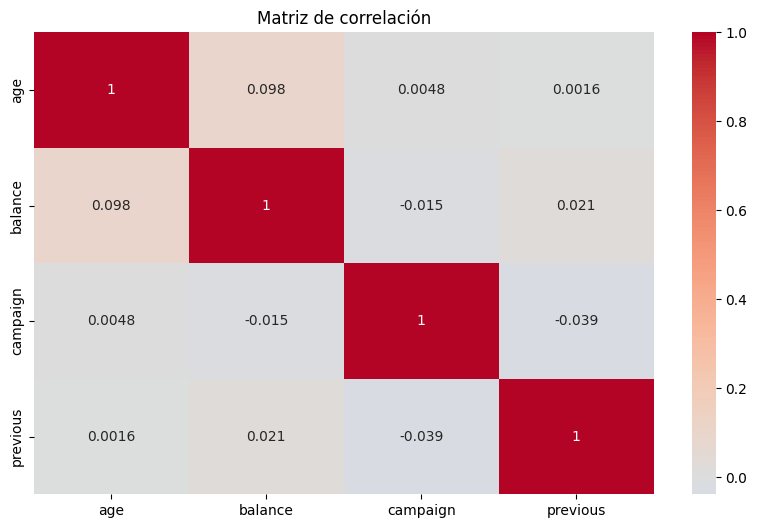

In [ ]:
# Seleccionar columnas numéricas
numeric_cols = data_cleaned.select_dtypes(include="number").columns

# Crear matriz de correlación
corr_matrix = data_cleaned[numeric_cols].corr()

# Visualizar matriz de correlación
plt.figure(figsize=(10,6))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", center=0)
plt.title("Matriz de correlación")
plt.show()

## **13-Modelo de regresión logística**

Para la creación del modelo de regresión logística se utilizarán las siguientes librerías de Python:
* matplotlib=Librería para visualizaciones de datos.
* numpy=Procesamiento numérico.
* scikit=Importar métricas, agrupaciones...

Al igual que en el modelo lineal, se dividen los datos en X e Y, según las columnas, y a su vez se dividen los datos en datos de entrenamiento y de prueba. Se crea el modelo de regresión logística para realizar las predicciones de valores según los datos de entrenamiento.

La variables X son las variables independientes, las cuales en función de éstas, tratarán de predecir la variable dependiente o Y. La variable a predecir será y, para predecir si un cliente solicitará un depósito a largo plazo.

Las métricas de evaluación a emplear para este modelo serán:
1. Matriz de confusión: Muestra gráficamente la comparación entre los valores predichos y reales, con los siguientes parámetros: verdaderos positivos (VP), donde el modelo predijo correctamente la clase positiva; verdaderos negativos (VN), donde el modelo predijo correctamente la clase negativa; falsos positivos (FP), donde el modelo predijo erróneamente la clase positiva y falsos negativos (FN), donde el modelo predijo erróneamente la clase negativa.
2. Accuracy: Indica la proporción de predicciones
correctas sobre el total de predicciones. Un modelo perfecto no tendría ningún falso positivo ni ningún falso negativo y, por lo tanto, tendría una precisión de 1.0 o 100%.
3. Precision: Mide la proporción de verdaderos positivos entre todas las predicciones positivas. Es útil cuando el costo de los falsos positivos es alto. Un modelo hipotético perfecto no tendría ningún falso positivo y, por lo tanto, una precisión de 1.0.
4.  Recall: Mide la proporción de verdaderos positivos entre todas las instancias positivas reales. Es importante cuando el costo de los falsos negativos es alto. Un modelo hipotético perfecto no tendría ningún falso negativo y, por lo tanto, una recuperación (TPR) de 1.0, es decir, una tasa de detección del 100%.


Se usan todas las variables restantes para predecir y, para visualizar las métricas de evaluación y emplear éstas métricas como referencia.

Accuracy : 0.7584909835158756
Precision: 0.2705786471067645
Recall   : 0.6281929990539262


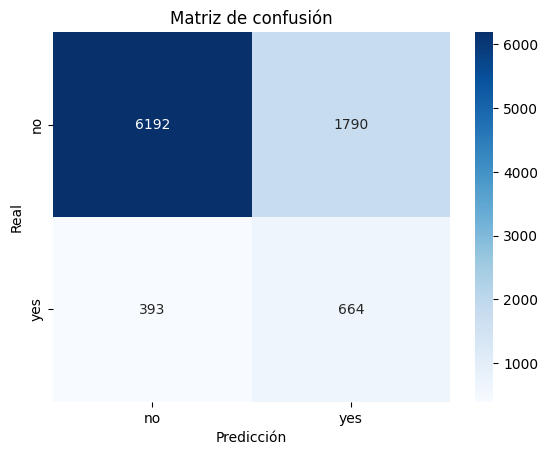

AUC-ROC: 0.771


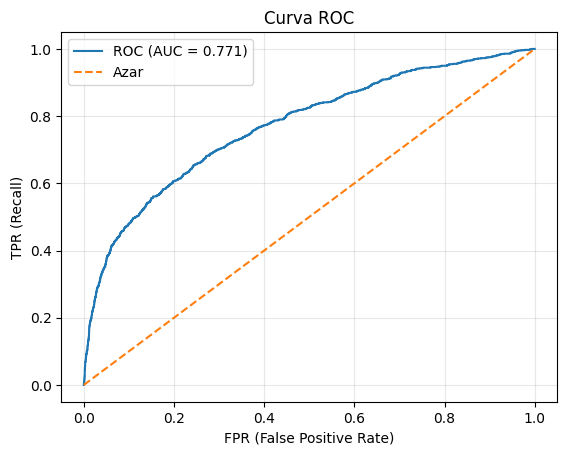

In [ ]:
# Importación de librerías
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, roc_curve, roc_auc_score

#División de los datos en variables X e Y
X = data_cleaned.drop("y", axis=1)
y = data_cleaned["y"]

# División en datos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Columnas numéricas
numeric_cols = ["age", "balance", "campaign", "previous"]

# Transformar y ajustar variables numéricas
scaler = StandardScaler()
X_train[numeric_cols] = scaler.fit_transform(X_train[numeric_cols])
X_test[numeric_cols] = scaler.transform(X_test[numeric_cols])

# Crear modelo de regresión logística
log_reg = LogisticRegression(max_iter=2000, solver="liblinear", class_weight="balanced")
log_reg.fit(X_train, y_train)

y_pred = log_reg.predict(X_test)

# Calcular Accuracy, Precision y Recall
print("Accuracy :", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred, pos_label="yes"))
print("Recall   :", recall_score(y_test, y_pred, pos_label="yes"))

# Matriz de confusión
cm = confusion_matrix(y_test, y_pred, labels=["no","yes"])
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=["no","yes"],
            yticklabels=["no","yes"])
plt.title("Matriz de confusión")
plt.xlabel("Predicción"); plt.ylabel("Real"); plt.show()

# Curva ROC y AUC
# Convertir y_test a binario: yes=1, no=0
y_true = (y_test == "yes").astype(int)
# Puntajes del modelo
y_score = log_reg.predict_proba(X_test)[:, 1]
# Curva ROC y AUC
fpr, tpr, thresholds = roc_curve(y_true, y_score)
auc = roc_auc_score(y_true, y_score)
print(f"AUC-ROC: {auc:.3f}")
# Gráfica
plt.figure()
plt.plot(fpr, tpr, label=f"ROC (AUC = {auc:.3f})")
plt.plot([0,1], [0,1], "--", label="Azar")
plt.xlabel("FPR (False Positive Rate)")
plt.ylabel("TPR (Recall)")
plt.title("Curva ROC")
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()


# **Conclusión**

El modelo de regresión logística predijo un ~75% de las veces correctamente los valores (accuracy), mientras que cuando el modelo predice “yes”, se predice correctamente un ~27% de las veces (precission) y de todos los clientes que realmente son “yes” (recall), el modelo detecta ~62%.

Esto quiere decir que el modelo es aceptable, aquí siendo más importante considerar los falsos negativos (el recall) porque si el modelo asume que un posible cliente no realice el depósito cuando en la práctica lo haría, representa una pérdida de ingresos para el banco al perder clientes. Sin embargo, este modelo puede ser mejorable.